<a href="https://colab.research.google.com/github/APMAPM1/AI-ML-internship/blob/Titanic/Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Titanic Dataset Analysis**

The sinking of the Titanic is one of the most infamous shipwrecks in history.

On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.

While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.

# **Loading dataset and few basic info collection**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive

In [3]:
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
file_path = "/content/drive/My Drive/Datasets/titanic.csv"

In [5]:
df = pd.read_csv(file_path)
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [ ]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [ ]:
df.shape

(891, 12)

In [ ]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [ ]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
print(df.describe(include=['object']))

                           Name   Sex  Ticket    Cabin Embarked
count                       891   891     891      204      889
unique                      891     2     681      147        3
top     Braund, Mr. Owen Harris  male  347082  B96 B98        S
freq                          1   577       7        4      644


In [ ]:
df['Age'].min()

0.42

In [ ]:
df.nunique()

,0
PassengerId,891
Survived,2
Pclass,3
Name,891
Sex,2
Age,88
SibSp,7
Parch,7
Ticket,681
Fare,248


In [ ]:
df['Sex'].value_counts()

,count
Sex,
male,577
female,314


In [ ]:
df['Cabin'].value_counts()

,count
Cabin,
B96 B98,4
G6,4
C23 C25 C27,4
C22 C26,3
F33,3
...,...
E34,1
C7,1
C54,1


# **Missing Values insights**

In [ ]:
import pandas as pd

# Count missing values in each column
missing_values = df.isnull().sum()
print("Missing Values Count:\n", missing_values)

# Check missing values percentage
missing_percentage = (df.isnull().sum() / len(df)) * 100
print("\nMissing Values Percentage:\n", missing_percentage)


Missing Values Count:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Missing Values Percentage:
 PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64


In [ ]:
df['Age'].mean()

29.69911764705882

In [ ]:
# Checking missing Age values by Pclass
print(df[df['Age'].isnull()].groupby('Pclass').size())

# Checking missing Cabin values by Pclass
print(df[df['Cabin'].isnull()].groupby('Pclass').size())

# Checking missing Embarked values by Sex
print(df[df['Embarked'].isnull()].groupby('Sex').size())


Pclass
1     30
2     11
3    136
dtype: int64
Pclass
1     40
2    168
3    479
dtype: int64
Sex
female    2
dtype: int64


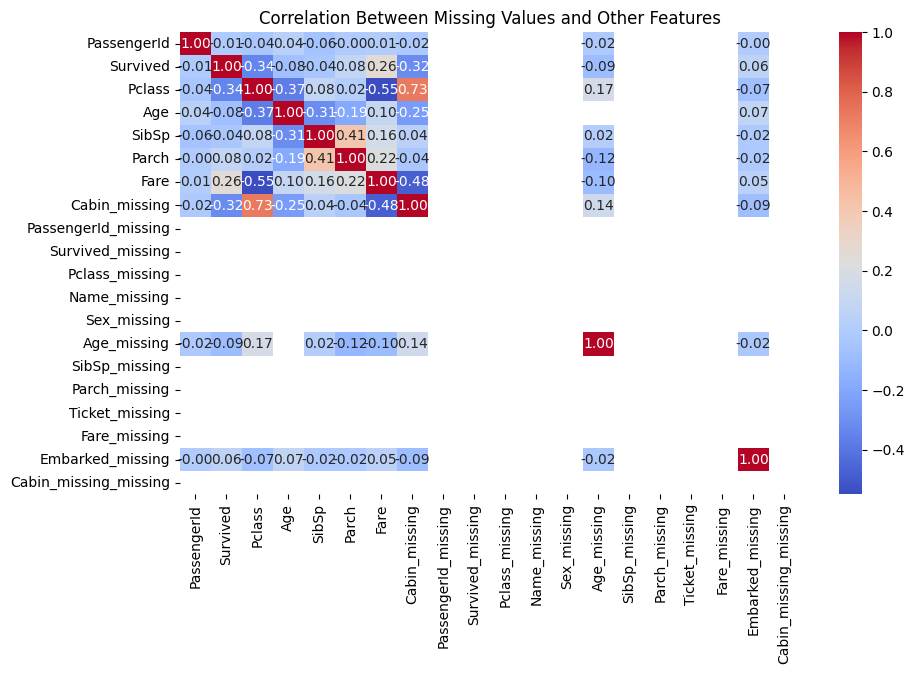

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a copy of the dataset
df_missing = df.copy()

# Convert missing values to numerical (1 for missing, 0 for present)
for col in df_missing.columns:
    df_missing[f"{col}_missing"] = df_missing[col].isnull().astype(int)

# Drop non-numeric columns (except the missing indicators)
df_numeric = df_missing.select_dtypes(include=['number'])

plt.figure(figsize=(10, 6))

# Compute and plot the correlation heatmap
sns.heatmap(df_numeric.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Between Missing Values and Other Features")
plt.show()


<ipython-input-23-aa269e731787>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Pclass", y="Cabin_missing", data=df, palette="coolwarm")


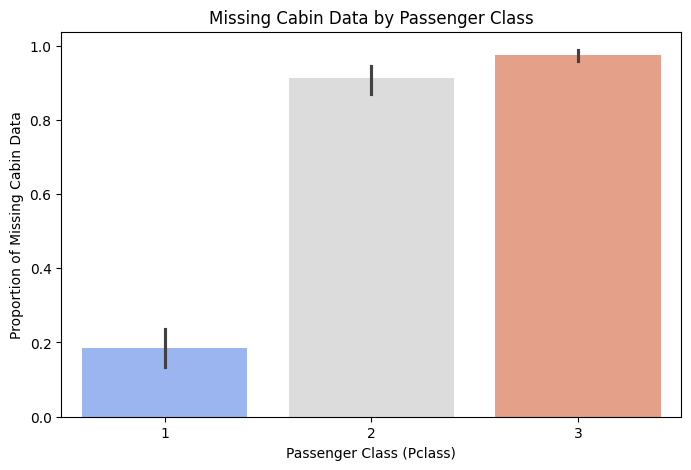

In [ ]:
# Create a binary column for missing Cabin values
df["Cabin_missing"] = df["Cabin"].isnull().astype(int)

plt.figure(figsize=(8, 5))

# Plot Pclass vs. Cabin Missing
sns.barplot(x="Pclass", y="Cabin_missing", data=df, palette="coolwarm")

# Add labels & title
plt.xlabel("Passenger Class (Pclass)")
plt.ylabel("Proportion of Missing Cabin Data")
plt.title("Missing Cabin Data by Passenger Class")
plt.show()

<ipython-input-25-af8a845aae2c>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df['Pclass'], y=df['Age'].isnull(), estimator=lambda x: sum(x)/len(x) * 100, palette="coolwarm")


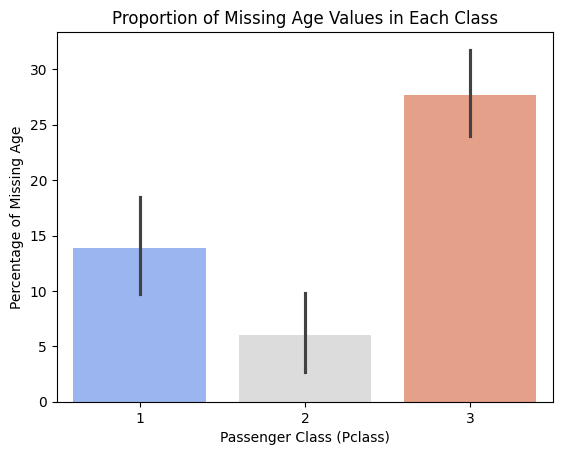

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a bar plot to show missing age proportion in each class
sns.barplot(x=df['Pclass'], y=df['Age'].isnull(), estimator=lambda x: sum(x)/len(x) * 100, palette="coolwarm")
plt.ylabel("Percentage of Missing Age")
plt.xlabel("Passenger Class (Pclass)")
plt.title("Proportion of Missing Age Values in Each Class")
plt.show()


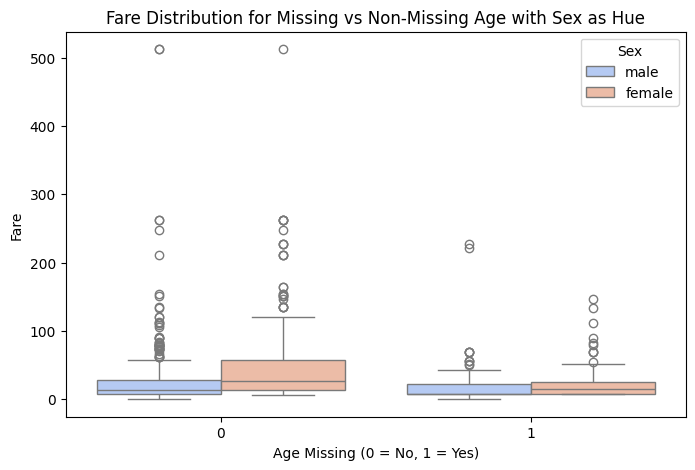

In [ ]:
plt.figure(figsize=(8, 5))

# Boxplot with hue (e.g., Sex)
sns.boxplot(x=df_missing['Age_missing'], y=df_missing['Fare'], hue=df_missing['Sex'], palette="coolwarm")

# Labels & title
plt.xlabel("Age Missing (0 = No, 1 = Yes)")
plt.ylabel("Fare")
plt.title("Fare Distribution for Missing vs Non-Missing Age with Sex as Hue")
plt.legend(title="Sex")  # Legend for hue
plt.show()

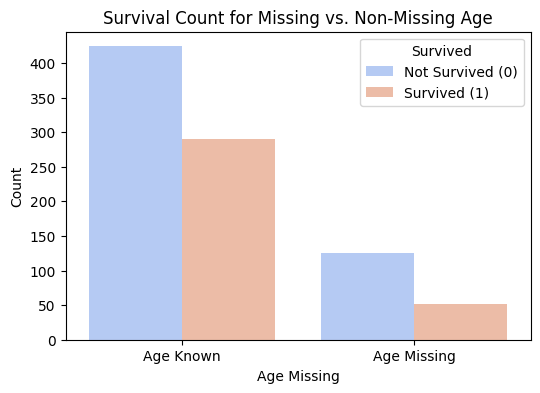

In [ ]:
# Create a countplot for missing Age values grouped by Survival
plt.figure(figsize=(6, 4))
sns.countplot(x=df['Age'].isnull(), hue=df['Survived'], palette="coolwarm")
plt.xticks(ticks=[0, 1], labels=['Age Known', 'Age Missing'])
plt.ylabel("Count")
plt.xlabel("Age Missing")
plt.title("Survival Count for Missing vs. Non-Missing Age")
plt.legend(title="Survived", labels=["Not Survived (0)", "Survived (1)"])
plt.show()

In [ ]:
age_missing_crosstab = pd.crosstab(df['Age'].isnull(), df['Survived'])
print(age_missing_crosstab)

Survived    0    1
Age               
False     424  290
True      125   52


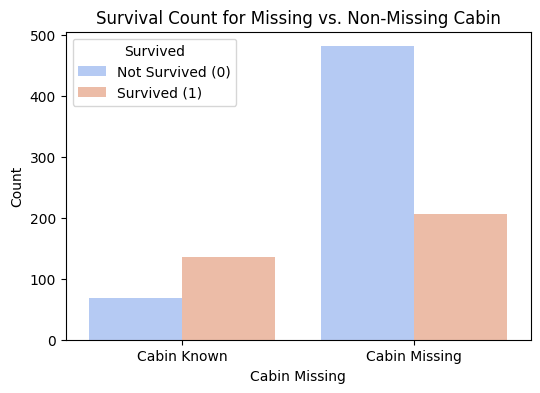

In [ ]:
# Create a countplot for missing Cabin values grouped by Survival
plt.figure(figsize=(6, 4))
sns.countplot(x=df['Cabin'].isnull(), hue=df['Survived'], palette="coolwarm")
plt.xticks(ticks=[0, 1], labels=['Cabin Known', 'Cabin Missing'])
plt.ylabel("Count")
plt.xlabel("Cabin Missing")
plt.title("Survival Count for Missing vs. Non-Missing Cabin")
plt.legend(title="Survived", labels=["Not Survived (0)", "Survived (1)"])
plt.show()

In [ ]:
import pandas as pd

# Crosstab to see missing values and survival counts
cabin_missing_crosstab = pd.crosstab(df['Cabin'].isnull(), df['Survived'])
print(cabin_missing_crosstab)


Survived    0    1
Cabin             
False      68  136
True      481  206


<ipython-input-20-09c85af2c4e4>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df['Embarked'], y=df['Age'].isnull(), estimator=lambda x: sum(x)/len(x) * 100, palette="coolwarm")


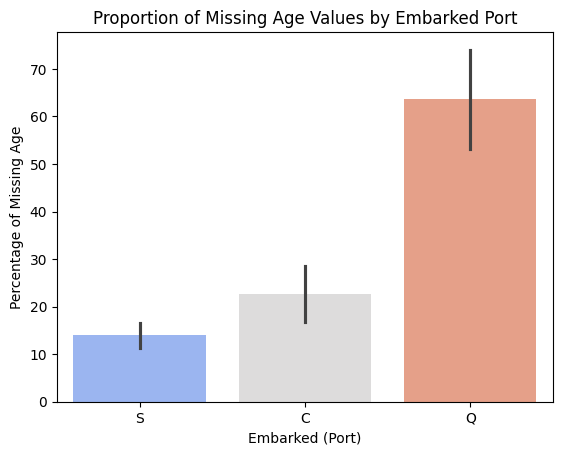

In [ ]:
# Create a bar plot to show missing age proportion by embarkation port
sns.barplot(x=df['Embarked'], y=df['Age'].isnull(), estimator=lambda x: sum(x)/len(x) * 100, palette="coolwarm")
plt.ylabel("Percentage of Missing Age")
plt.xlabel("Embarked (Port)")
plt.title("Proportion of Missing Age Values by Embarked Port")
plt.show()

In [ ]:
# Create a crosstab
age_missing_survival_embarked = pd.crosstab(df_missing_age['Embarked'], [df_missing_age['Age_missing'], df_missing_age['Survived']], margins=True)
print(age_missing_survival_embarked)

Age_missing    0         1      All
Survived       0    1    0   1     
Embarked                           
C             51   79   24  14  168
Q             20    8   27  22   77
S            353  201   74  16  644
All          424  288  125  52  889


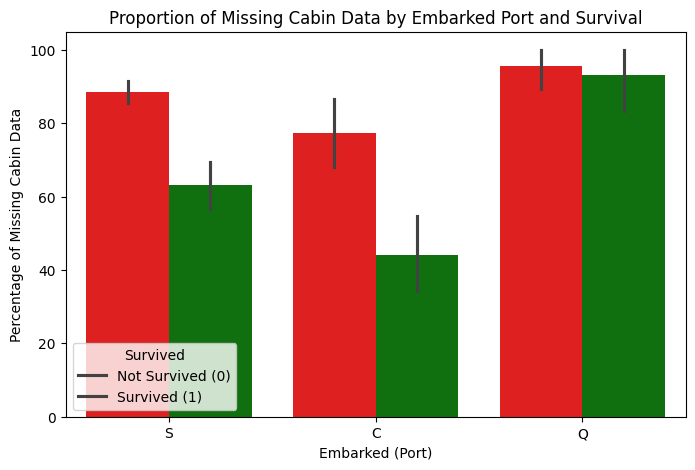

In [ ]:
# Create a copy and add a column indicating missing Cabin
df_cabin_missing = df.copy()
df_cabin_missing['Cabin_missing'] = df_cabin_missing['Cabin'].isnull().astype(int)

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(
    data=df_cabin_missing,
    x="Embarked",
    y="Cabin_missing",
    hue="Survived",
    estimator=lambda x: sum(x)/len(x) * 100,  # Convert to percentage
    palette={0: "red", 1: "green"}  # Red for Not Survived, Green for Survived
)

# Labels and title
plt.ylabel("Percentage of Missing Cabin Data")
plt.xlabel("Embarked (Port)")
plt.title("Proportion of Missing Cabin Data by Embarked Port and Survival")
plt.legend(title="Survived", labels=["Not Survived (0)", "Survived (1)"])
plt.show()


<ipython-input-92-69f6820affa0>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


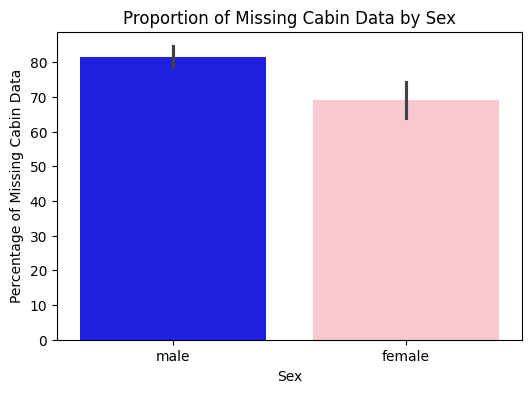

In [ ]:
plt.figure(figsize=(6, 4))
sns.barplot(
    data=df,
    x="Sex",
    y=df["Cabin"].isnull().astype(int),
    estimator=lambda x: sum(x)/len(x) * 100,  # Convert to percentage
    palette={"male": "blue", "female": "pink"}
)

# Labels and Title
plt.ylabel("Percentage of Missing Cabin Data")
plt.xlabel("Sex")
plt.title("Proportion of Missing Cabin Data by Sex")
plt.show()


<ipython-input-26-1f0106986e14>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


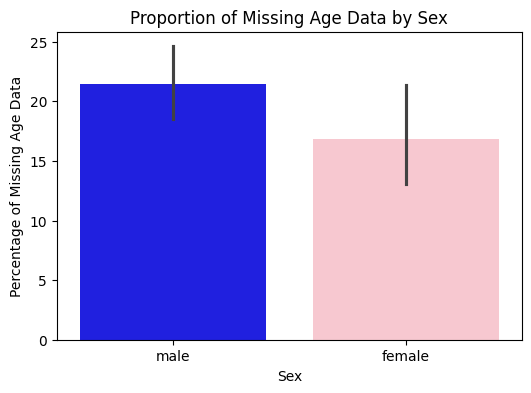

In [ ]:
plt.figure(figsize=(6, 4))
sns.barplot(
    data=df,
    x="Sex",
    y=df["Age"].isnull().astype(int),
    estimator=lambda x: sum(x)/len(x) * 100,
    palette={"male": "blue", "female": "pink"}
)

# Labels and Title
plt.ylabel("Percentage of Missing Age Data")
plt.xlabel("Sex")
plt.title("Proportion of Missing Age Data by Sex")
plt.show()


<ipython-input-31-3edf4a8df86a>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


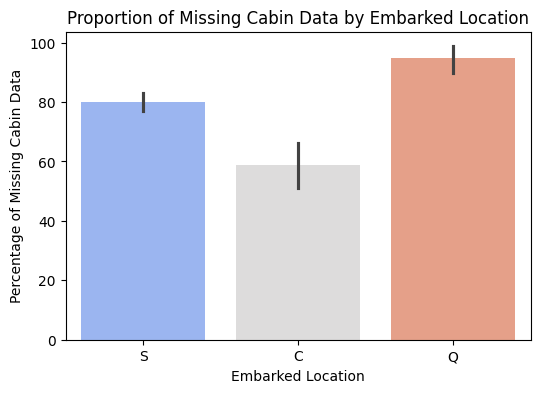

In [ ]:
plt.figure(figsize=(6, 4))
sns.barplot(
    data=df,
    x="Embarked",
    y=df["Cabin"].isnull().astype(int),
    estimator=lambda x: sum(x)/len(x) * 100,
    palette="coolwarm"
)

# Labels and Title
plt.ylabel("Percentage of Missing Cabin Data")
plt.xlabel("Embarked Location")
plt.title("Proportion of Missing Cabin Data by Embarked Location")
plt.show()


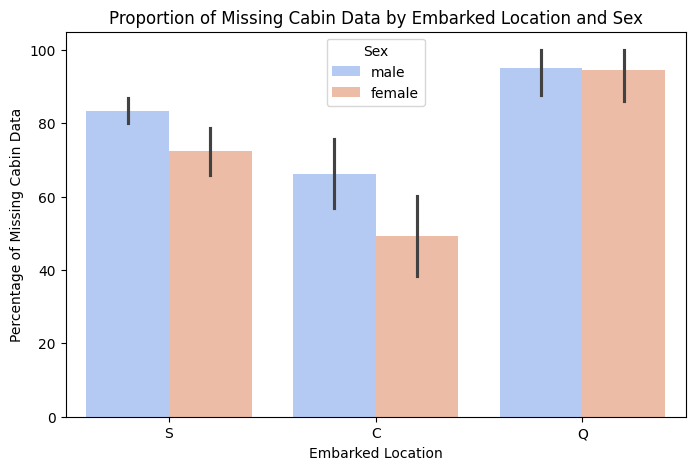

In [ ]:
plt.figure(figsize=(8, 5))
sns.barplot(
    data=df,
    x="Embarked",
    y=df["Cabin"].isnull().astype(int),
    hue="Sex",  # Adding sex as a hue
    estimator=lambda x: sum(x)/len(x) * 100,
    palette="coolwarm"
)

# Labels and Title
plt.ylabel("Percentage of Missing Cabin Data")
plt.xlabel("Embarked Location")
plt.title("Proportion of Missing Cabin Data by Embarked Location and Sex")
plt.legend(title="Sex")  # Adding legend for better clarity
plt.show()


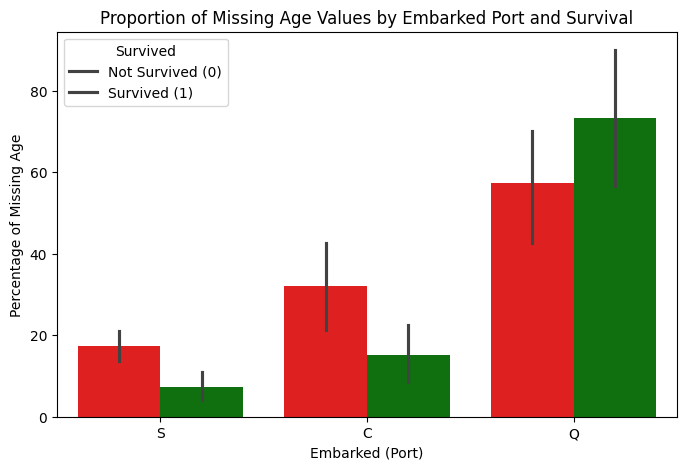

In [ ]:
# Group by Embarked and Survived, then calculate the percentage of missing Age
df_missing_age = df.copy()
df_missing_age['Age_missing'] = df_missing_age['Age'].isnull().astype(int)

# Bar plot
plt.figure(figsize=(8, 5))
sns.barplot(x=df_missing_age['Embarked'], y=df_missing_age['Age_missing'], hue=df_missing_age['Survived'], estimator=lambda x: sum(x)/len(x) * 100, palette={0: "red", 1: "green"})
plt.ylabel("Percentage of Missing Age")
plt.xlabel("Embarked (Port)")
plt.title("Proportion of Missing Age Values by Embarked Port and Survival")
plt.legend(title="Survived", labels=["Not Survived (0)", "Survived (1)"])
plt.show()


<ipython-input-9-f558e8c17e24>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


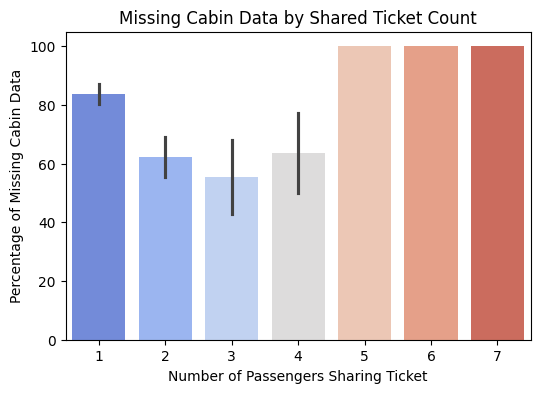

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Count passengers per ticket
df['Ticket_count'] = df.groupby('Ticket')['Ticket'].transform('count')

plt.figure(figsize=(6, 4))
sns.barplot(
    data=df,
    x=df["Ticket_count"],
    y=df["Cabin"].isnull().astype(int),
    estimator=lambda x: sum(x) / len(x) * 100,
    palette="coolwarm"
)
plt.xlabel("Number of Passengers Sharing Ticket")
plt.ylabel("Percentage of Missing Cabin Data")
plt.title("Missing Cabin Data by Shared Ticket Count")
plt.show()


# **Individual Insights**

Ticket Insights

<ipython-input-30-b85c19103573>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['Survived'], y=df['Ticket_count'], palette="coolwarm")


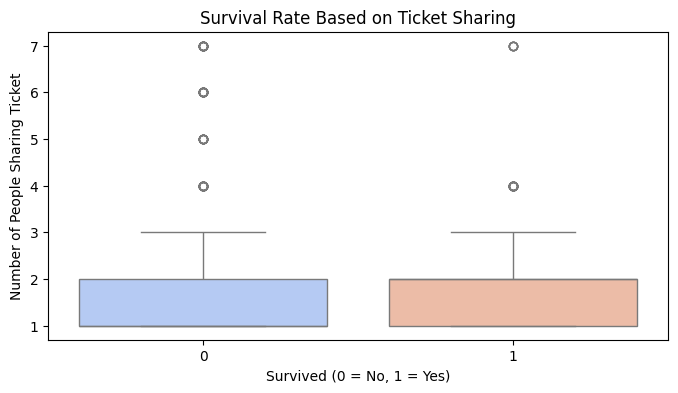

In [ ]:
plt.figure(figsize=(8, 4))
sns.boxplot(x=df['Survived'], y=df['Ticket_count'], palette="coolwarm")
plt.xlabel("Survived (0 = No, 1 = Yes)")
plt.ylabel("Number of People Sharing Ticket")
plt.title("Survival Rate Based on Ticket Sharing")
plt.show()


<ipython-input-24-032789c46b10>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['Ticket_count'], y=df['Fare'], palette="coolwarm")


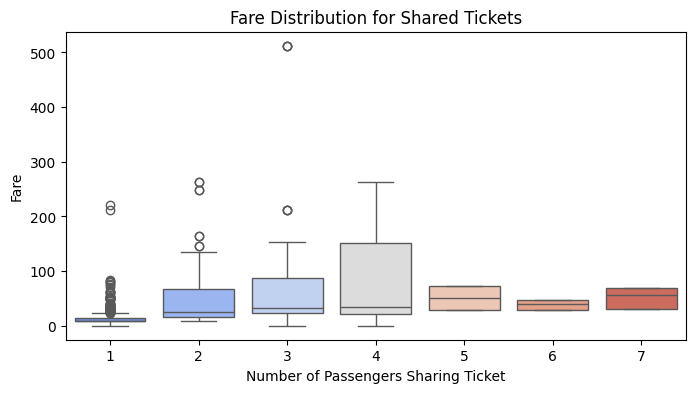

In [ ]:
plt.figure(figsize=(8, 4))
sns.boxplot(x=df['Ticket_count'], y=df['Fare'], palette="coolwarm")
plt.xlabel("Number of Passengers Sharing Ticket")
plt.ylabel("Fare")
plt.title("Fare Distribution for Shared Tickets")
plt.show()


In [ ]:
import pandas as pd

# Extract ticket prefixes
df['Ticket_prefix'] = df['Ticket'].apply(lambda x: x.split()[0] if not x.isnumeric() else 'Numeric')

# Group less frequent prefixes into "Other"
top_prefixes = df['Ticket_prefix'].value_counts().nlargest(5).index  # Select top 5 prefixes
df['Ticket_prefix'] = df['Ticket_prefix'].apply(lambda x: x if x in top_prefixes else 'Other')

# Create a pivot table
ticket_embarked_distribution = df.pivot_table(
    index='Embarked',
    columns='Ticket_prefix',
    aggfunc='size',
    fill_value=0
)

# Display the table
print(ticket_embarked_distribution)


Ticket_prefix  A/5  C.A.  Numeric  Other  PC  STON/O
Embarked                                            
C                0     0      107     15  46       0
Q                0     0       76      1   0       0
S               10    27      476    105  14      12


<ipython-input-95-1f1319110125>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df['Ticket_group_size'], y=df['Survived'], palette="coolwarm")


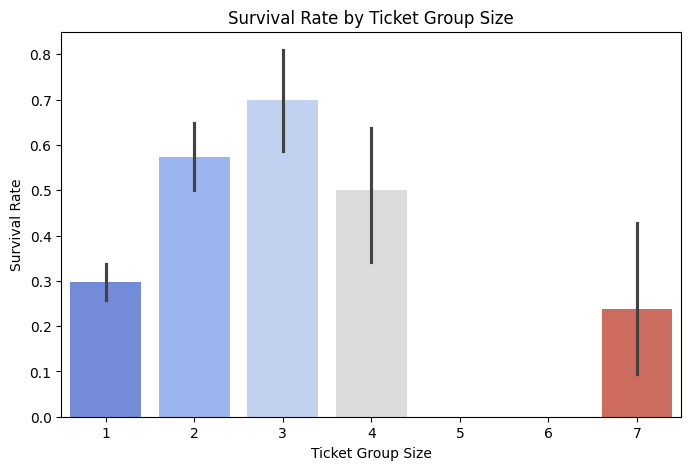

In [ ]:
df['Ticket_group_size'] = df.groupby('Ticket')['Ticket'].transform('count')
plt.figure(figsize=(8, 5))
sns.barplot(x=df['Ticket_group_size'], y=df['Survived'], palette="coolwarm")
plt.xlabel("Ticket Group Size")
plt.ylabel("Survival Rate")
plt.title("Survival Rate by Ticket Group Size")
plt.show()


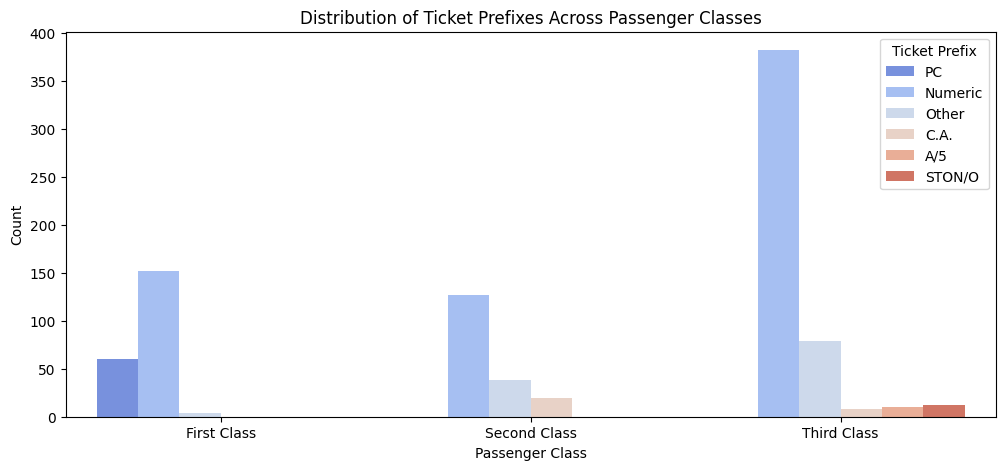

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 5))
sns.countplot(x=df['Pclass'], hue=df['Ticket_prefix'], palette="coolwarm")
plt.xlabel("Passenger Class")
plt.ylabel("Count")
plt.title("Distribution of Ticket Prefixes Across Passenger Classes")
plt.xticks([0, 1, 2], labels=["First Class", "Second Class", "Third Class"])
plt.legend(title="Ticket Prefix", loc="upper right")
plt.show()


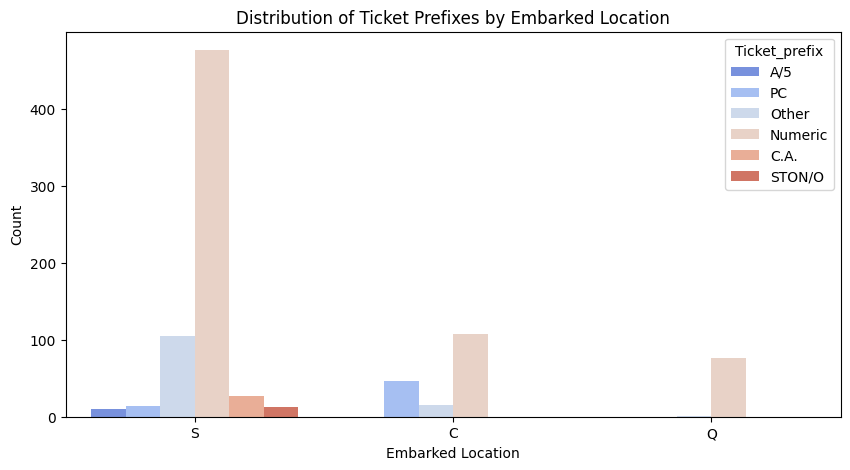

In [ ]:
plt.figure(figsize=(10, 5))
sns.countplot(x=df['Embarked'], hue=df['Ticket_prefix'], palette="coolwarm")
plt.xlabel("Embarked Location")
plt.ylabel("Count")
plt.title("Distribution of Ticket Prefixes by Embarked Location")
plt.show()


In [6]:
# Define age bins and labels
age_bins = [0, 10, 20, 50, float('inf')]
age_labels = ['0', '1', '2', '3']

# Create the new column
df['Age_Group'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels, right=True)


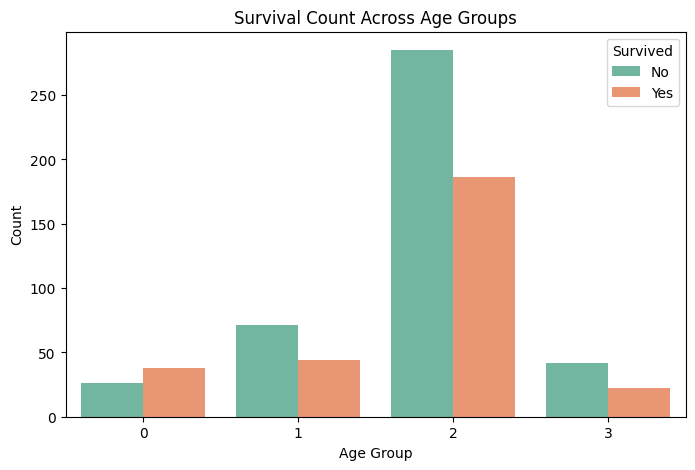

In [ ]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Age_Group', hue='Survived', data=df, palette='Set2')
plt.title("Survival Count Across Age Groups")
plt.xlabel("Age Group")
plt.ylabel("Count")
plt.legend(title="Survived", labels=["No", "Yes"])
plt.show()


Age Insights

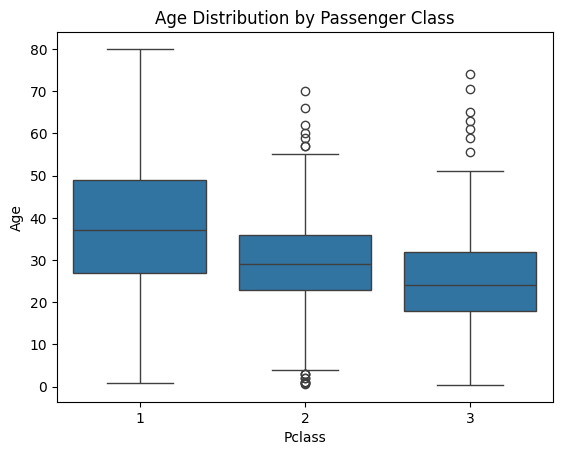

     Pclass  Survived
61        1         1
829       1         1


In [ ]:
# 🔹 Check missing values in 'Age' grouped by 'Pclass'
sns.boxplot(x=df["Pclass"], y=df["Age"])
plt.title("Age Distribution by Passenger Class")
plt.show()

# 🔹 Compare missing values in 'Embarked' with survival rate
print(df[df['Embarked'].isnull()][["Pclass", "Survived"]])

<ipython-input-29-71d5236b77a2>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_survival = df.groupby('Age_Group')['Survived'].mean() * 100
<ipython-input-29-71d5236b77a2>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=age_survival.index, y=age_survival.values, palette='coolwarm')


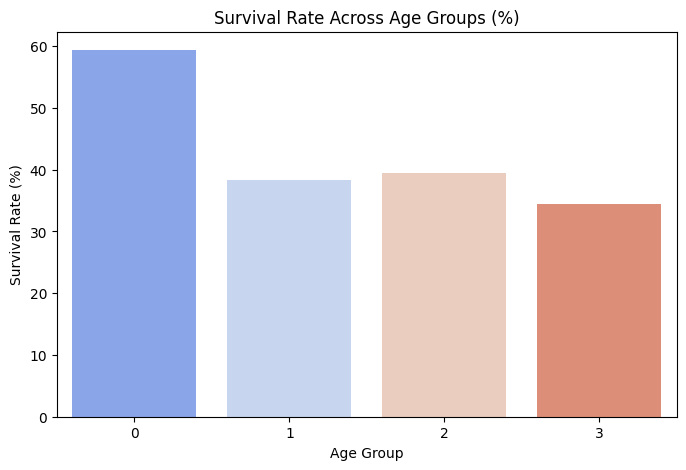

In [ ]:
age_survival = df.groupby('Age_Group')['Survived'].mean() * 100
plt.figure(figsize=(8, 5))
sns.barplot(x=age_survival.index, y=age_survival.values, palette='coolwarm')
plt.title("Survival Rate Across Age Groups (%)")
plt.xlabel("Age Group")
plt.ylabel("Survival Rate (%)")
plt.show()


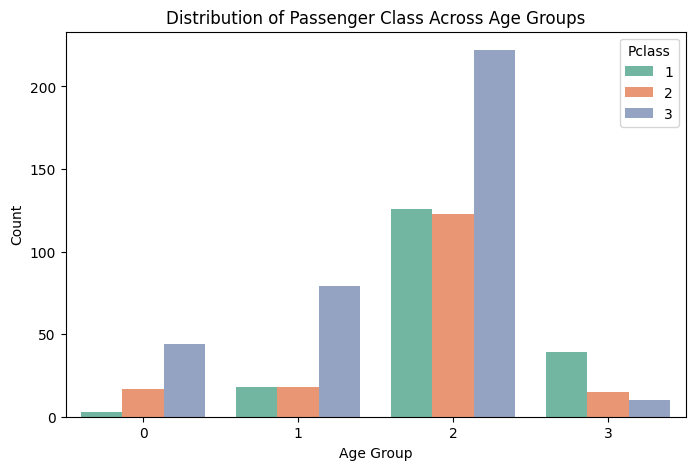

In [ ]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Age_Group', hue='Pclass', data=df, palette='Set2')
plt.title("Distribution of Passenger Class Across Age Groups")
plt.xlabel("Age Group")
plt.ylabel("Count")
plt.legend(title="Pclass")
plt.show()

<Figure size 1200x600 with 0 Axes>

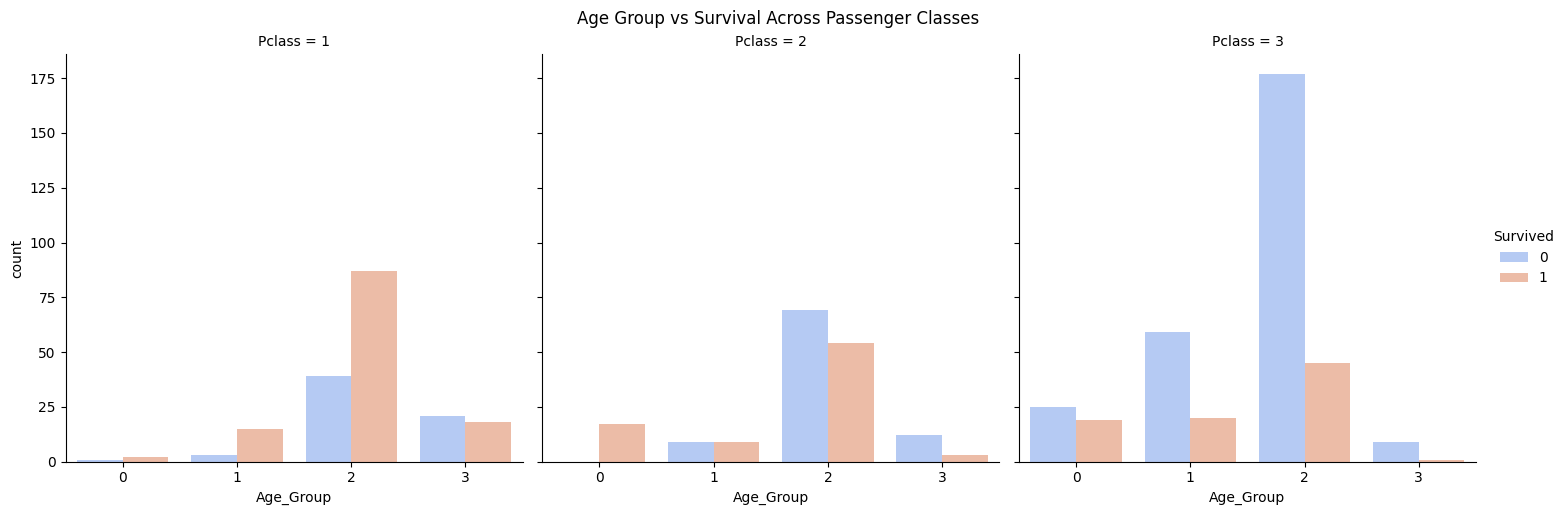

In [ ]:
plt.figure(figsize=(12, 6))
sns.catplot(x="Age_Group", hue="Survived", col="Pclass", data=df, kind="count", palette="coolwarm")
plt.suptitle("Age Group vs Survival Across Passenger Classes", y=1.02)
plt.show()


<Figure size 1200x600 with 0 Axes>

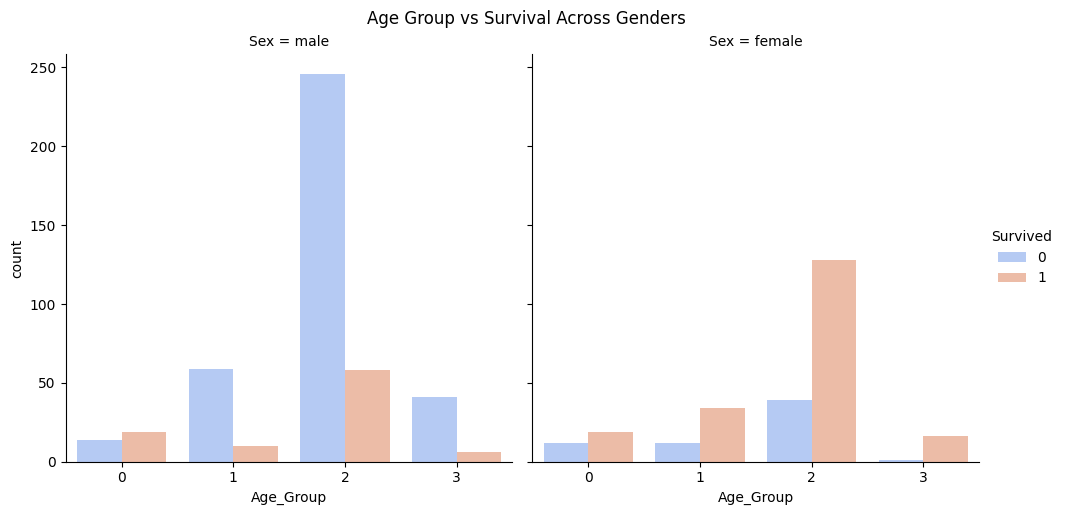

In [ ]:
plt.figure(figsize=(12, 6))
sns.catplot(x="Age_Group", hue="Survived", col="Sex", data=df, kind="count", palette="coolwarm")
plt.suptitle("Age Group vs Survival Across Genders", y=1.02)
plt.show()

In [ ]:
df['Family'] = df['SibSp'] + df['Parch'] + 1

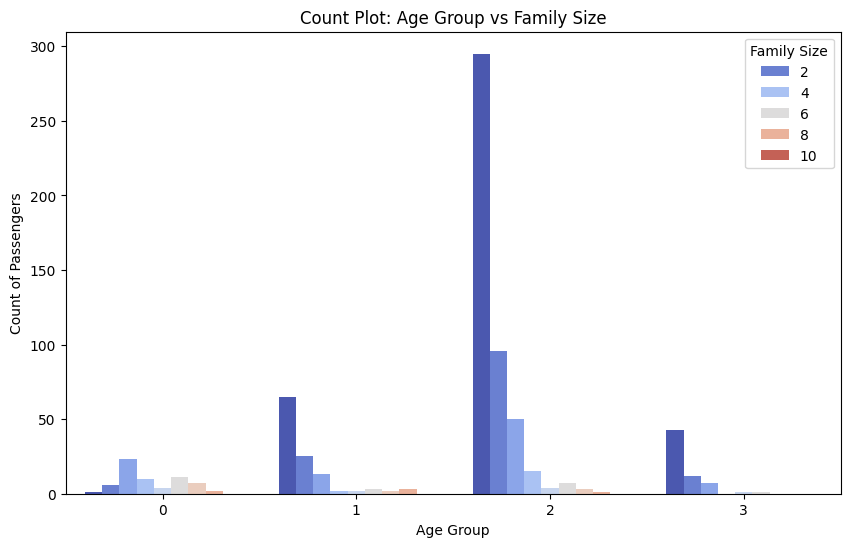

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Age_Group', hue='Family', data=df, palette='coolwarm')
plt.title("Count Plot: Age Group vs Family Size")
plt.xlabel("Age Group")
plt.ylabel("Count of Passengers")
plt.legend(title="Family Size")
plt.show()


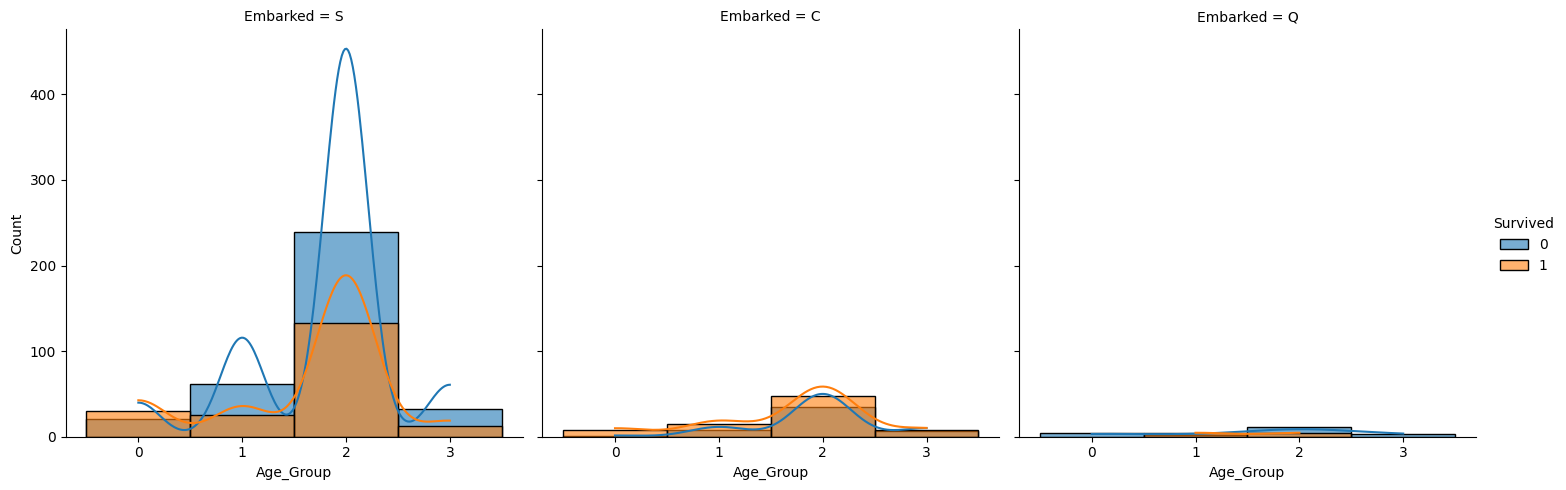

In [ ]:
g = sns.FacetGrid(df, col="Embarked", hue="Survived", height=5, aspect=1)
g.map(sns.histplot, "Age_Group", kde=True, bins=30, alpha=0.6)
g.add_legend()
plt.show()


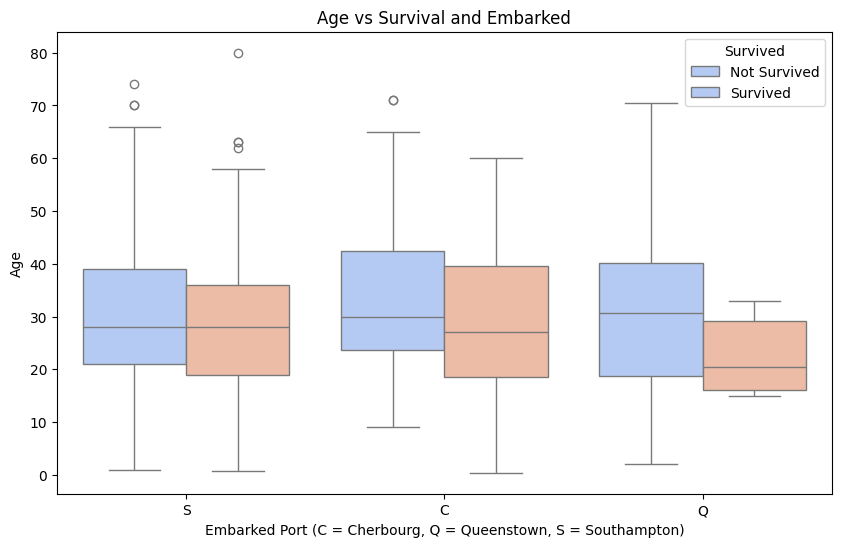

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Embarked', y='Age', hue='Survived', data=df, palette='coolwarm')
plt.title("Age vs Survival and Embarked")
plt.xlabel("Embarked Port (C = Cherbourg, Q = Queenstown, S = Southampton)")
plt.ylabel("Age")
plt.legend(title="Survived", labels=["Not Survived", "Survived"])
plt.show()


In [ ]:
age_embarked_survival = df.groupby(['Age_Group', 'Embarked', 'Survived']).size().unstack()
age_embarked_survival.columns = ['Not Survived', 'Survived']
print(age_embarked_survival)

                    Not Survived  Survived
Age_Group Embarked                        
0         C                    1         8
          Q                    4         0
          S                   21        30
1         C                    8        15
          Q                    2         4
          S                   61        25
2         C                   35        48
          Q                   11         4
          S                  239       133
3         C                    7         8
          Q                    3         0
          S                   32        13


<ipython-input-99-65560bdeeb40>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_embarked_survival = df.groupby(['Age_Group', 'Embarked', 'Survived']).size().unstack()


In [9]:
df['Cabin_Category'] = df['Cabin'].str[0]
df['Cabin_Category'] = df['Cabin_Category'].map({'A': 0, 'B': 1, 'C':2, 'D': 3, 'E': 4, 'F':5, 'G':6, 'T':7})

<ipython-input-36-4b52c9497998>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_cabin_survival = df.groupby(['Age_Group', 'Cabin_Category', 'Survived']).size().unstack()


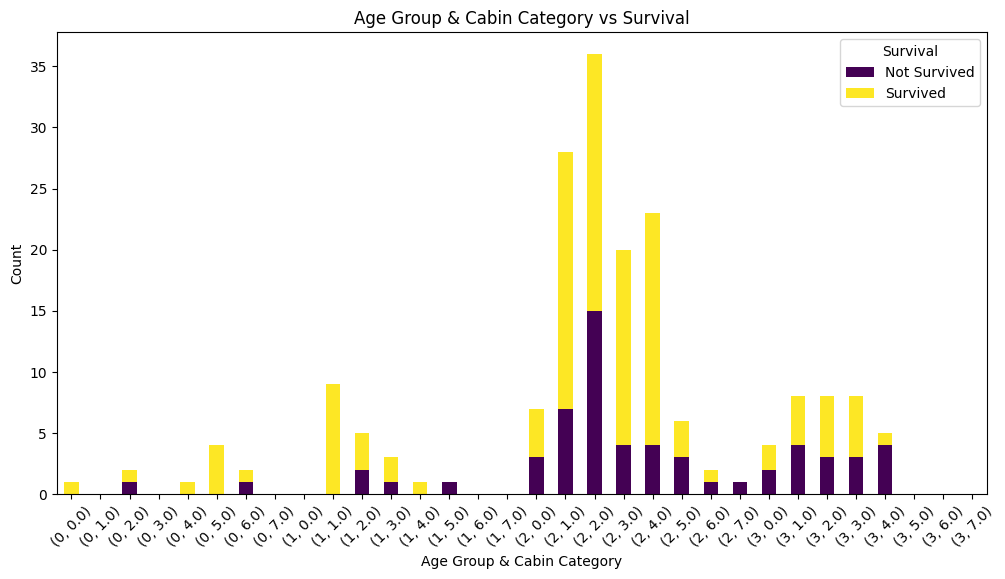

In [ ]:
age_cabin_survival = df.groupby(['Age_Group', 'Cabin_Category', 'Survived']).size().unstack()
age_cabin_survival.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='viridis')
plt.title("Age Group & Cabin Category vs Survival")
plt.xlabel("Age Group & Cabin Category")
plt.ylabel("Count")
plt.legend(title="Survival", labels=["Not Survived", "Survived"])
plt.xticks(rotation=45)
plt.show()


In [ ]:
age_cabin_survival = df.groupby(['Age_Group', 'Cabin_Category', 'Survived']).size().unstack()
age_cabin_survival.columns = ['Not Survived', 'Survived']
print(age_cabin_survival)


                          Not Survived  Survived
Age_Group Cabin_Category                        
0         0.0                        0         1
          1.0                        0         0
          2.0                        1         1
          3.0                        0         0
          4.0                        0         1
          5.0                        0         4
          6.0                        1         1
          7.0                        0         0
1         0.0                        0         0
          1.0                        0         9
          2.0                        2         3
          3.0                        1         2
          4.0                        0         1
          5.0                        1         0
          6.0                        0         0
          7.0                        0         0
2         0.0                        3         4
          1.0                        7        21
          2.0       

<ipython-input-37-4b9f0a541e93>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_cabin_survival = df.groupby(['Age_Group', 'Cabin_Category', 'Survived']).size().unstack()


In [10]:
df['Title'] = df['Name'].apply(lambda x: x.split(',')[1].split('.')[0].strip())
df['Title_encoded'] = df['Title'].map({'Mr': 0, 'Miss': 1, 'Mlle':1, 'Mrs': 2, 'Mme':2, 'Master': 3}).fillna(4).astype(int)

Fare Insights

In [ ]:
df['Fare'].max()

512.3292

In [11]:
fare_bins = [0, 100, 200, 300, 400, 550]
fare_labels = ['0', '1', '2', '3', '4']

# Create new Fare_Group column
df['Fare_Group'] = pd.cut(df['Fare'], bins=fare_bins, labels=fare_labels, right=False)

# Display first few rows to verify
print(df[['Fare', 'Fare_Group']].head())
print(df['Fare_Group'].value_counts())

      Fare Fare_Group
0   7.2500          0
1  71.2833          0
2   7.9250          0
3  53.1000          0
4   8.0500          0
Fare_Group
0    838
1     33
2     17
4      3
3      0
Name: count, dtype: int64


In [ ]:
import pandas as pd

# Relationship between Fare Group and Survival (Count)
fare_survival = pd.crosstab(df['Fare_Group'], df['Survived'])
print("Fare Group vs Survival:\n", fare_survival)

# Relationship between Fare Group and Passenger Class (Count)
fare_pclass = pd.crosstab(df['Fare_Group'], df['Pclass'])
print("\nFare Group vs Pclass:\n", fare_pclass)

# Relationship between Fare Group and Sex (Count)
fare_sex = pd.crosstab(df['Fare_Group'], df['Sex'])
print("\nFare Group vs Sex:\n", fare_sex)

# Relationship between Fare Group and Embarked (Count)
fare_embarked = pd.crosstab(df['Fare_Group'], df['Embarked'])
print("\nFare Group vs Embarked:\n", fare_embarked)


Fare Group vs Survival:
 Survived      0    1
Fare_Group          
0           535  303
1             8   25
2             6   11
4             0    3

Fare Group vs Pclass:
 Pclass        1    2    3
Fare_Group               
0           163  184  491
1            33    0    0
2            17    0    0
4             3    0    0

Fare Group vs Sex:
 Sex         female  male
Fare_Group              
0              280   558
1               22    11
2               11     6
4                1     2

Fare Group vs Embarked:
 Embarked      C   Q    S
Fare_Group              
0           139  77  620
1            17   0   16
2             9   0    8
4             3   0    0


In [ ]:
import pandas as pd

# Relationship between Fare Group, Pclass, and Survival
fare_pclass_survival = pd.crosstab(index=[df['Fare_Group'], df['Pclass']],
                                   columns=df['Survived'])

print("Fare Group vs Pclass vs Survival:\n", fare_pclass_survival)


Fare Group vs Pclass vs Survival:
 Survived             0    1
Fare_Group Pclass          
0          1        66   97
           2        97   87
           3       372  119
1          1         8   25
2          1         6   11
4          1         0    3


In [ ]:
# Create a crosstab of Fare Group, Embarked, and Survival
fare_embarked_survival_table = pd.crosstab(index=[df['Fare_Group'], df['Embarked']],
                                           columns=df['Survived'])

# Reset index for better display
fare_embarked_survival_table.columns = ['Not Survived', 'Survived']
fare_embarked_survival_table.reset_index(inplace=True)

# Display table
print(fare_embarked_survival_table)

  Fare_Group Embarked  Not Survived  Survived
0          0        C            67        72
1          0        Q            47        30
2          0        S           421       199
3          1        C             5        12
4          1        S             3        13
5          2        C             3         6
6          2        S             3         5
7          4        C             0         3


In [ ]:
import pandas as pd

# Create a crosstab table for Age Group, Fare Group, and Survival
age_fare_survival_table = pd.crosstab(index=[df['Age_Group'], df['Fare_Group']],
                                      columns=df['Survived'])

# Rename columns for better readability
age_fare_survival_table.columns = ['Not Survived', 'Survived']
age_fare_survival_table.reset_index(inplace=True)

# Display table
print(age_fare_survival_table)


   Age_Group Fare_Group  Not Survived  Survived
0          0          0            25        37
1          0          1             1         1
2          1          0            69        37
3          1          1             1         4
4          1          2             1         3
5          2          0           278       160
6          2          1             5        15
7          2          2             2         8
8          2          4             0         3
9          3          0            40        20
10         3          1             1         2
11         3          2             1         0


In [ ]:
import pandas as pd

# Create a crosstab for Fare Group, Family Size, and Survival
fare_family_survival_table = pd.crosstab(index=[df['Fare_Group'], df['Family']],
                                         columns=df['Survived'])

# Rename columns for better readability
fare_family_survival_table.columns = ['Not Survived', 'Survived']
fare_family_survival_table.reset_index(inplace=True)

# Display the table
print(fare_family_survival_table)


   Fare_Group  Family  Not Survived  Survived
0           0       1           371       150
1           0       2            68        78
2           0       3            40        53
3           0       4             6        16
4           0       5            12         1
5           0       6            17         1
6           0       7             8         4
7           0       8             6         0
8           0      11             7         0
9           1       1             1         8
10          1       2             3         6
11          1       3             2         6
12          1       4             2         5
13          2       1             2         3
14          2       2             1         4
15          2       3             1         0
16          2       5             0         2
17          2       6             2         2
18          4       1             0         2
19          4       2             0         1


In [ ]:
import pandas as pd

# Create a crosstab for Fare Group, Gender, and Survival
fare_gender_survival_table = pd.crosstab(index=[df['Fare_Group'], df['Sex']],
                                         columns=df['Survived'])

# Rename columns for better readability
fare_gender_survival_table.columns = ['Not Survived', 'Survived']
fare_gender_survival_table.reset_index(inplace=True)

# Display the table
print(fare_gender_survival_table)


  Fare_Group     Sex  Not Survived  Survived
0          0  female            79       201
1          0    male           456       102
2          1  female             2        20
3          1    male             6         5
4          2  female             0        11
5          2    male             6         0
6          4  female             0         1
7          4    male             0         2


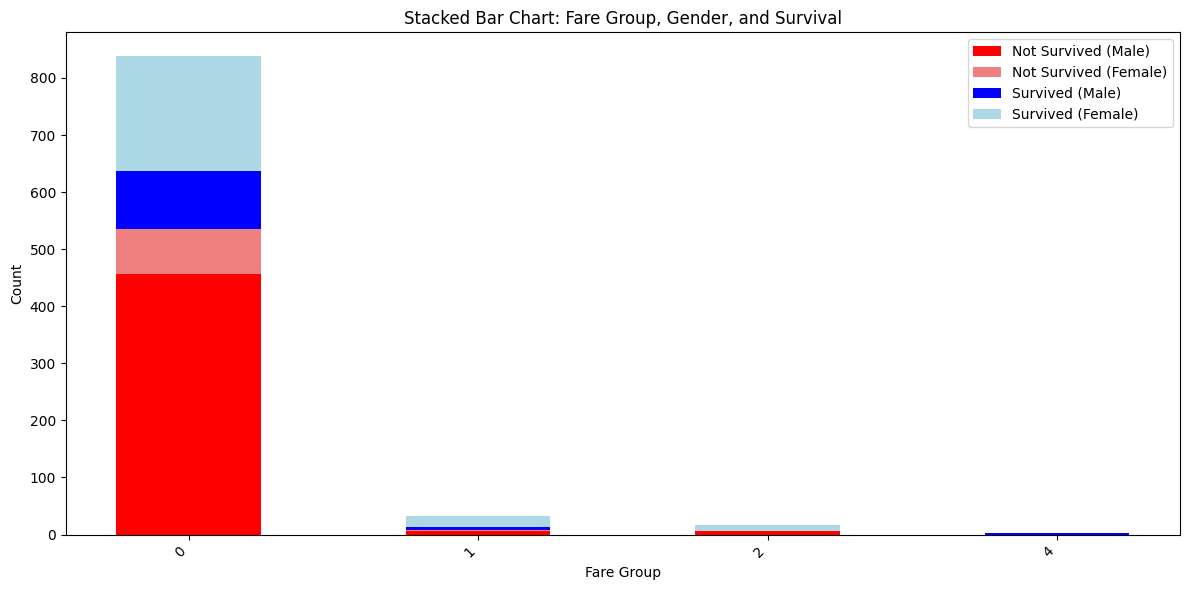

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Pivot data for stacked bar plot
pivot_data = fare_gender_survival_table.pivot(index='Fare_Group', columns='Sex', values=['Not Survived', 'Survived'])

# Create the stacked bar chart
fig, ax = plt.subplots(figsize=(12, 6))

# Bar positions
x = np.arange(len(pivot_data.index))

# Bar width
bar_width = 0.5

# Plot bars for Not Survived
ax.bar(x, pivot_data['Not Survived']['male'], color='red', label='Not Survived (Male)', width=bar_width)
ax.bar(x, pivot_data['Not Survived']['female'], bottom=pivot_data['Not Survived']['male'],
       color='lightcoral', label='Not Survived (Female)', width=bar_width)

# Plot bars for Survived
ax.bar(x, pivot_data['Survived']['male'], bottom=pivot_data['Not Survived']['male'] + pivot_data['Not Survived']['female'],
       color='blue', label='Survived (Male)', width=bar_width)
ax.bar(x, pivot_data['Survived']['female'], bottom=pivot_data['Not Survived']['male'] + pivot_data['Not Survived']['female'] + pivot_data['Survived']['male'],
       color='lightblue', label='Survived (Female)', width=bar_width)

# Customizing the plot
ax.set_xticks(x)
ax.set_xticklabels(pivot_data.index, rotation=45, ha='right')
ax.set_xlabel("Fare Group")
ax.set_ylabel("Count")
ax.set_title("Stacked Bar Chart: Fare Group, Gender, and Survival")
ax.legend()

plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd

# Create a crosstab for Fare Group, Cabin Category, and Survival
fare_cabin_survival_table = pd.crosstab(index=[df['Fare_Group'], df['Cabin_Category']],
                                        columns=df['Survived'])

# Rename columns for better readability
fare_cabin_survival_table.columns = ['Not Survived', 'Survived']
fare_cabin_survival_table.reset_index(inplace=True)

# Display the table
print(fare_cabin_survival_table)


   Fare_Group  Cabin_Category  Not Survived  Survived
0           0             0.0             8         7
1           0             1.0            11        21
2           0             2.0            14        22
3           0             3.0             7        23
4           0             4.0             8        22
5           0             5.0             5         8
6           0             6.0             2         2
7           0             7.0             1         0
8           1             1.0             0         6
9           1             2.0             6         9
10          1             3.0             1         2
11          1             4.0             0         2
12          2             1.0             1         6
13          2             2.0             4         4
14          4             1.0             0         2


Title Insights

In [ ]:
import pandas as pd

# Title vs Survival
title_survival = pd.crosstab(df['Title_encoded'], df['Survived'])
title_survival.columns = ['Not Survived', 'Survived']
print("\nTitle Encoded vs Survival:\n", title_survival)

# Title vs Pclass and Survival
title_pclass_survival = pd.crosstab([df['Title_encoded'], df['Pclass']], df['Survived'])
title_pclass_survival.columns = ['Not Survived', 'Survived']
print("\nTitle Encoded vs Pclass & Survival:\n", title_pclass_survival)

# Title vs Gender and Survival
title_gender_survival = pd.crosstab([df['Title_encoded'], df['Sex']], df['Survived'])
title_gender_survival.columns = ['Not Survived', 'Survived']
print("\nTitle Encoded vs Gender & Survival:\n", title_gender_survival)

# Title vs Embarked and Survival
title_embarked_survival = pd.crosstab([df['Title_encoded'], df['Embarked']], df['Survived'])
title_embarked_survival.columns = ['Not Survived', 'Survived']
print("\nTitle Encoded vs Embarked & Survival:\n", title_embarked_survival)

# Title vs Fare Group and Survival
title_fare_survival = pd.crosstab([df['Title_encoded'], df['Fare_Group']], df['Survived'])
title_fare_survival.columns = ['Not Survived', 'Survived']
print("\nTitle Encoded vs Fare Group & Survival:\n", title_fare_survival)



Title Encoded vs Survival:
                Not Survived  Survived
Title_encoded                        
0                       436        81
1                        55       129
2                        26       100
3                        17        23
4                        15         9

Title Encoded vs Pclass & Survival:
                       Not Survived  Survived
Title_encoded Pclass                        
0             1                 70        37
              2                 83         8
              3                283        36
1             1                  2        46
              2                  2        32
              3                 51        51
2             1                  1        42
              2                  4        37
              3                 21        21
3             1                  0         3
              2                  0         9
              3                 17        11
4             1                  7   

Family Insights

In [ ]:
import pandas as pd

# Family vs Survival
family_survival = pd.crosstab(df['Family'], df['Survived'])
family_survival.columns = ['Not Survived', 'Survived']
print("\nFamily vs Survival:\n", family_survival)

# Family vs Pclass and Survival
family_pclass_survival = pd.crosstab([df['Family'], df['Pclass']], df['Survived'])
family_pclass_survival.columns = ['Not Survived', 'Survived']
print("\nFamily vs Pclass & Survival:\n", family_pclass_survival)

# Family vs Gender and Survival
family_gender_survival = pd.crosstab([df['Family'], df['Sex']], df['Survived'])
family_gender_survival.columns = ['Not Survived', 'Survived']
print("\nFamily vs Gender & Survival:\n", family_gender_survival)

# Family vs Embarked and Survival
family_embarked_survival = pd.crosstab([df['Family'], df['Embarked']], df['Survived'])
family_embarked_survival.columns = ['Not Survived', 'Survived']
print("\nFamily vs Embarked & Survival:\n", family_embarked_survival)

# Family vs Fare Group and Survival
family_fare_survival = pd.crosstab([df['Family'], df['Fare_Group']], df['Survived'])
family_fare_survival.columns = ['Not Survived', 'Survived']
print("\nFamily vs Fare Group & Survival:\n", family_fare_survival)

# Family vs Age Group and Survival
family_age_survival = pd.crosstab([df['Family'], df['Age_Group']], df['Survived'])
family_age_survival.columns = ['Not Survived', 'Survived']
print("\nFamily vs Age Group & Survival:\n", family_age_survival)



Family vs Survival:
         Not Survived  Survived
Family                        
1                374       163
2                 72        89
3                 43        59
4                  8        21
5                 12         3
6                 19         3
7                  8         4
8                  6         0
11                 7         0

Family vs Pclass & Survival:
                Not Survived  Survived
Family Pclass                        
1      1                 51        58
       2                 68        36
       3                255        69
2      1                 19        51
       2                 16        18
       3                 37        20
3      1                  6        18
       2                 10        21
       3                 27        20
4      1                  2         5
       2                  3        10
       3                  3         6
5      1                  0         2
       2                  0         

Ticket length Insights

In [ ]:
import pandas as pd

# Create Ticket Length column
df['Ticket_Length'] = df['Ticket'].astype(str).apply(len)

# Ticket Length vs Survival
ticket_survival = pd.crosstab(df['Ticket_Length'], df['Survived'])
ticket_survival.columns = ['Not Survived', 'Survived']
print("\nTicket Length vs Survival:\n", ticket_survival)

# Ticket Length vs Pclass and Survival
ticket_pclass_survival = pd.crosstab([df['Ticket_Length'], df['Pclass']], df['Survived'])
ticket_pclass_survival.columns = ['Not Survived', 'Survived']
print("\nTicket Length vs Pclass & Survival:\n", ticket_pclass_survival)

# Ticket Length vs Gender and Survival
ticket_gender_survival = pd.crosstab([df['Ticket_Length'], df['Sex']], df['Survived'])
ticket_gender_survival.columns = ['Not Survived', 'Survived']
print("\nTicket Length vs Gender & Survival:\n", ticket_gender_survival)

# Ticket Length vs Embarked and Survival
ticket_embarked_survival = pd.crosstab([df['Ticket_Length'], df['Embarked']], df['Survived'])
ticket_embarked_survival.columns = ['Not Survived', 'Survived']
print("\nTicket Length vs Embarked & Survival:\n", ticket_embarked_survival)

# Ticket Length vs Fare Group and Survival
ticket_fare_survival = pd.crosstab([df['Ticket_Length'], df['Fare_Group']], df['Survived'])
ticket_fare_survival.columns = ['Not Survived', 'Survived']
print("\nTicket Length vs Fare Group & Survival:\n", ticket_fare_survival)

# Ticket Length vs Age Group and Survival
ticket_age_survival = pd.crosstab([df['Ticket_Length'], df['Age_Group']], df['Survived'])
ticket_age_survival.columns = ['Not Survived', 'Survived']
print("\nTicket Length vs Age Group & Survival:\n", ticket_age_survival)



Ticket Length vs Survival:
                Not Survived  Survived
Ticket_Length                        
3                         2         0
4                        64        37
5                        50        81
6                       285       134
7                        19         8
8                        35        41
9                        21         5
10                       27        14
11                        6         2
12                        6         4
13                        6         4
15                        6         3
16                        8         3
17                        8         6
18                        6         0

Ticket Length vs Pclass & Survival:
                       Not Survived  Survived
Ticket_Length Pclass                        
3             1                  2         0
4             1                  1         0
              2                  0         4
              3                 63        33
5             1  

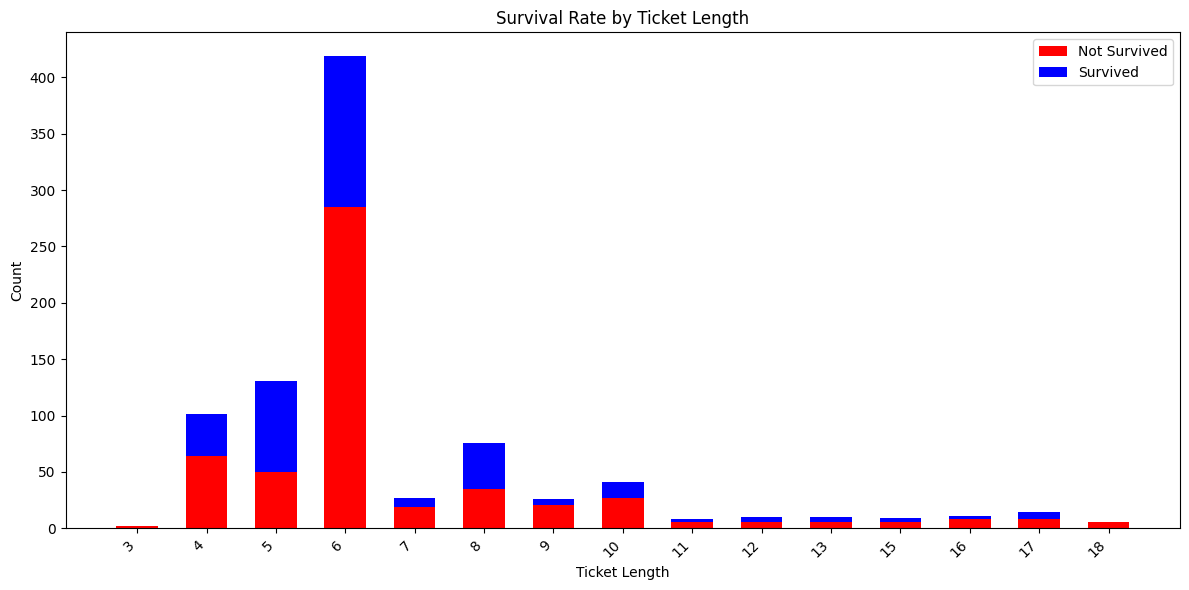

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Aggregate Survival Data for Ticket Length
ticket_survival_pivot = ticket_survival.reset_index()

# Plotting
fig, ax = plt.subplots(figsize=(12, 6))

# Bar width
bar_width = 0.6

# Positions on X-axis
x = np.arange(len(ticket_survival_pivot['Ticket_Length']))

# Stacked Bars
ax.bar(x, ticket_survival_pivot['Not Survived'], color='red', label="Not Survived", width=bar_width)
ax.bar(x, ticket_survival_pivot['Survived'], bottom=ticket_survival_pivot['Not Survived'],
       color='blue', label="Survived", width=bar_width)

# Customizing the plot
ax.set_xticks(x)
ax.set_xticklabels(ticket_survival_pivot['Ticket_Length'], rotation=45, ha='right')
ax.set_xlabel("Ticket Length")
ax.set_ylabel("Count")
ax.set_title("Survival Rate by Ticket Length")
ax.legend()

plt.tight_layout()
plt.show()


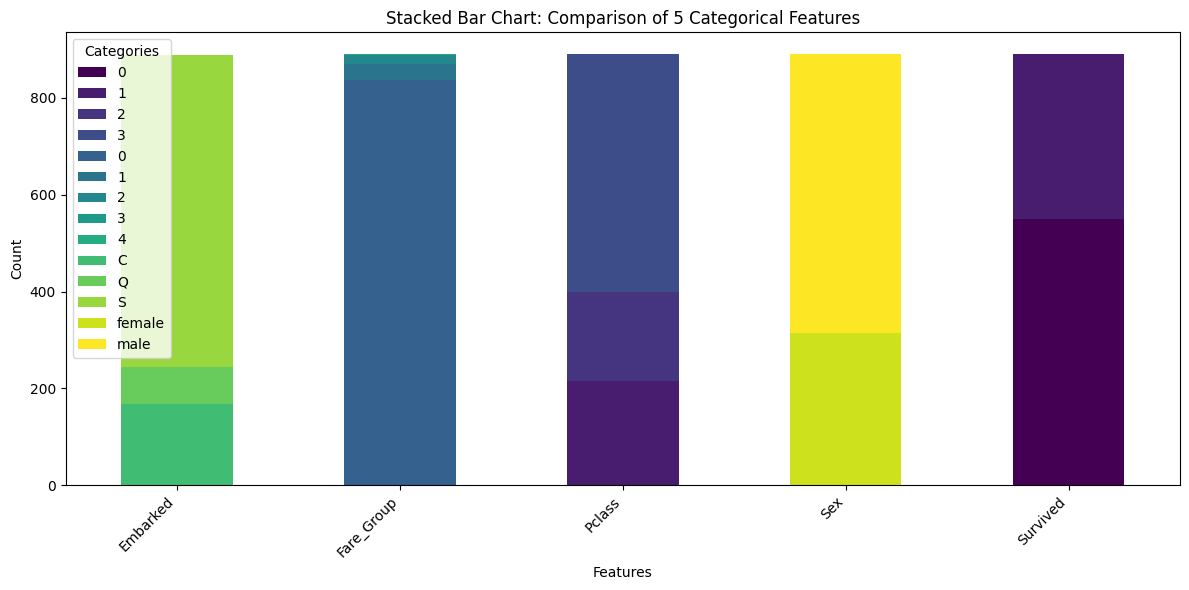

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Example categorical columns
categorical_columns = ['Pclass', 'Fare_Group', 'Embarked', 'Sex', 'Survived']

# Prepare data for stacked bar plot
stacked_data = []
for column in categorical_columns:
    temp_df = df[column].value_counts().reset_index()
    temp_df.columns = ['Category', 'Count']
    temp_df['Feature'] = column
    stacked_data.append(temp_df)

# Combine all into one DataFrame
stacked_df = pd.concat(stacked_data)

# Pivot for stacked bar plot
pivot_df = stacked_df.pivot(index='Feature', columns='Category', values='Count').fillna(0)

# Plot
pivot_df.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='viridis')

plt.title("Stacked Bar Chart: Comparison of 5 Categorical Features")
plt.ylabel("Count")
plt.xlabel("Features")
plt.xticks(rotation=45, ha='right')
plt.legend(title="Categories")
plt.tight_layout()
plt.show()


In [7]:
df['Age_Group'].unique()

['2', NaN, '3', '0', '1']
Categories (4, object): ['0' < '1' < '2' < '3']

In [ ]:
df['Fare_Group'].unique()

['0', '2', '1', '4']
Categories (5, object): ['0' < '1' < '2' < '3' < '4']

In [12]:
import pandas as pd

# Creating a tabular summary
age_sex_survived_embarked_pclass = pd.crosstab(
    index=[df['Age_Group'], df['Sex'], df['Title_encoded'], df['Fare_Group'] ],
    columns=[df['Survived'], df['Embarked'], df['Pclass'],],
    margins=True
)

# Display the table
print(age_sex_survived_embarked_pclass)


Survived                                    0                                \
Embarked                                    C         Q          S            
Pclass                                      1  2   3  1  2   3   1   2    3   
Age_Group Sex    Title_encoded Fare_Group                                     
0         female 1             0            0  0   1  0  0   0   0   0   10   
                               1            0  0   0  0  0   0   1   0    0   
          male   3             0            0  0   0  0  0   4   0   0   10   
                               1            0  0   0  0  0   0   0   0    0   
1         female 1             0            0  0   3  0  0   1   0   0    7   
                               1            0  0   0  0  0   0   0   0    0   
                               2            0  0   0  0  0   0   0   0    0   
                 2             0            0  0   0  0  0   0   0   0    1   
                               1            0  0   0

Survival Insights

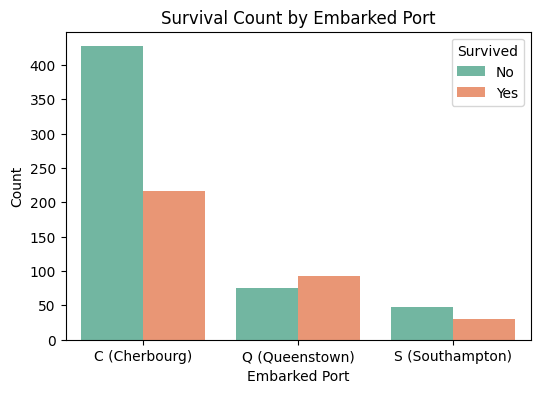

In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Embarked', hue='Survived', data=df, palette='Set2')
plt.title("Survival Count by Embarked Port")
plt.xlabel("Embarked Port")
plt.ylabel("Count")
plt.xticks(ticks=[0, 1, 2], labels=['C (Cherbourg)', 'Q (Queenstown)', 'S (Southampton)'])
plt.legend(title="Survived", labels=["No", "Yes"])
plt.show()


<ipython-input-47-3a31faa350ab>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=embarked_survival.index, y=embarked_survival.values, palette='coolwarm')


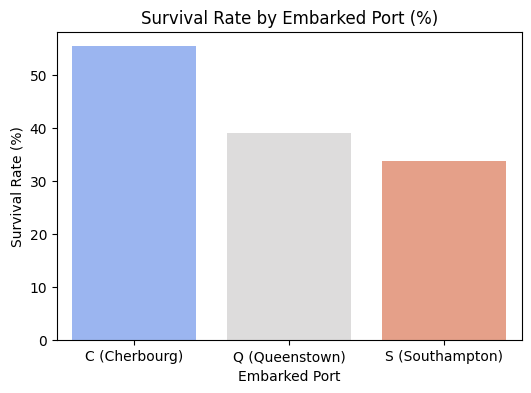

In [ ]:
embarked_survival = df.groupby('Embarked')['Survived'].mean() * 100
plt.figure(figsize=(6, 4))
sns.barplot(x=embarked_survival.index, y=embarked_survival.values, palette='coolwarm')
plt.title("Survival Rate by Embarked Port (%)")
plt.xlabel("Embarked Port")
plt.ylabel("Survival Rate (%)")
plt.xticks(ticks=[0, 1, 2], labels=['C (Cherbourg)', 'Q (Queenstown)', 'S (Southampton)'])
plt.show()


# **With handling missing**

In [ ]:
df['Age'] = df['Age'].fillna(df['Age'].median())

In [ ]:
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_missing,Ticket_count,Ticket_prefix,Ticket_group_size,Age_Group
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,1,A/5,1,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,1,PC,1,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,1,Other,1,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,2,Numeric,2,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,1,Numeric,1,2
5,6,0,3,"Moran, Mr. James",male,28.0,0,0,330877,8.4583,NaN,Q,1,1,Numeric,1,NaN
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,0,1,Numeric,1,3
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,1,4,Numeric,4,0
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,1,3,Numeric,3,2
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,1,2,Numeric,2,1


In [ ]:
df.tail(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_missing,Ticket_count,Ticket_prefix,Ticket_group_size,Age_Group
881,882,0,3,"Markun, Mr. Johann",male,33.0,0,0,349257,7.8958,NaN,S,1,1,Numeric,1,2
882,883,0,3,"Dahlberg, Miss. Gerda Ulrika",female,22.0,0,0,7552,10.5167,NaN,S,1,1,Numeric,1,2
883,884,0,2,"Banfield, Mr. Frederick James",male,28.0,0,0,C.A./SOTON 34068,10.5000,NaN,S,1,1,Other,1,2
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S,1,1,Other,1,2
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q,1,5,Numeric,5,2
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,1,1,Numeric,1,2
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,0,1,Numeric,1,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,NaN,S,1,2,Other,2,NaN
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,0,1,Numeric,1,2
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.7500,NaN,Q,1,1,Numeric,1,2


In [ ]:
df['Embarked']=df['Embarked'].fillna(df['Embarked'].mode()[0])

In [ ]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   PassengerId        891 non-null    int64   
 1   Survived           891 non-null    int64   
 2   Pclass             891 non-null    int64   
 3   Name               891 non-null    object  
 4   Sex                891 non-null    object  
 5   Age                891 non-null    float64 
 6   SibSp              891 non-null    int64   
 7   Parch              891 non-null    int64   
 8   Ticket             891 non-null    object  
 9   Fare               891 non-null    float64 
 10  Cabin              204 non-null    object  
 11  Embarked           891 non-null    object  
 12  Cabin_missing      891 non-null    int64   
 13  Ticket_count       891 non-null    int64   
 14  Ticket_prefix      891 non-null    object  
 15  Ticket_group_size  891 non-null    int64   
 16  Age_Grou

In [ ]:
df['Survived'].value_counts()

,count
Survived,
0,549
1,342


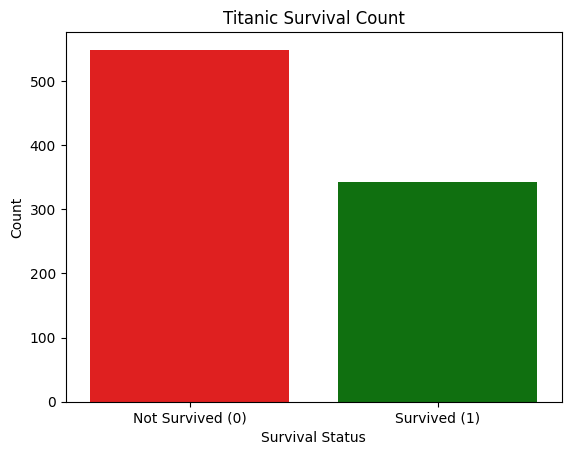

In [ ]:
sns.countplot(x='Survived', data=df, hue='Survived', palette={0: 'red', 1: 'green'}, legend=False)

# Customize labels and title
plt.xticks([0, 1], ['Not Survived (0)', 'Survived (1)'])
plt.xlabel("Survival Status")
plt.ylabel("Count")
plt.title("Titanic Survival Count")

# Show the plot
plt.show()

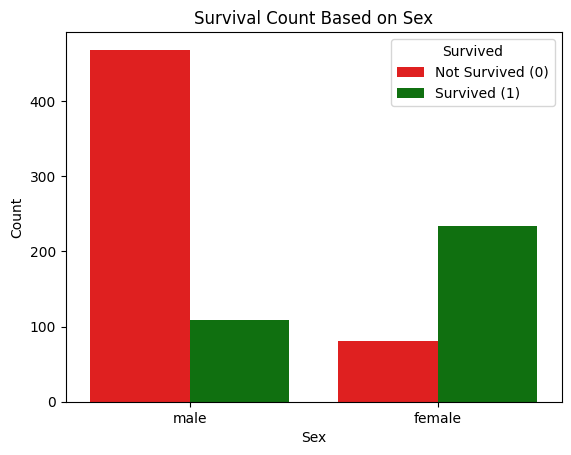

In [ ]:
sns.countplot(x='Sex', data=df, hue='Survived', palette={0: 'red', 1: 'green'})

# Customize labels and title
plt.xlabel("Sex")
plt.ylabel("Count")
plt.title("Survival Count Based on Sex")
plt.legend(title="Survived", labels=["Not Survived (0)", "Survived (1)"])

# Show the plot
plt.show()

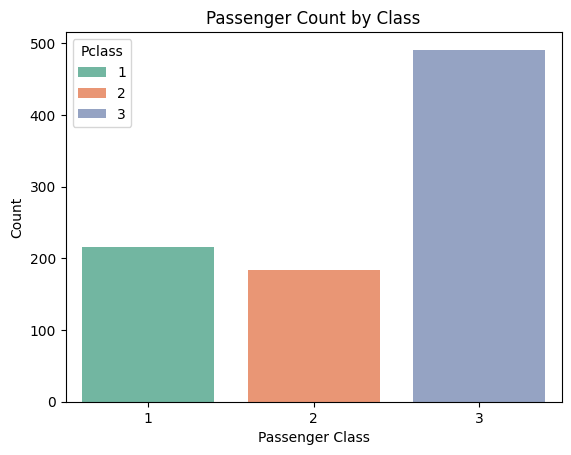

In [ ]:
sns.countplot(x='Pclass', data=df, hue='Pclass', palette="Set2")

# Customize labels and title
plt.xlabel("Passenger Class")
plt.ylabel("Count")
plt.title("Passenger Count by Class")

# Show the plot
plt.show()

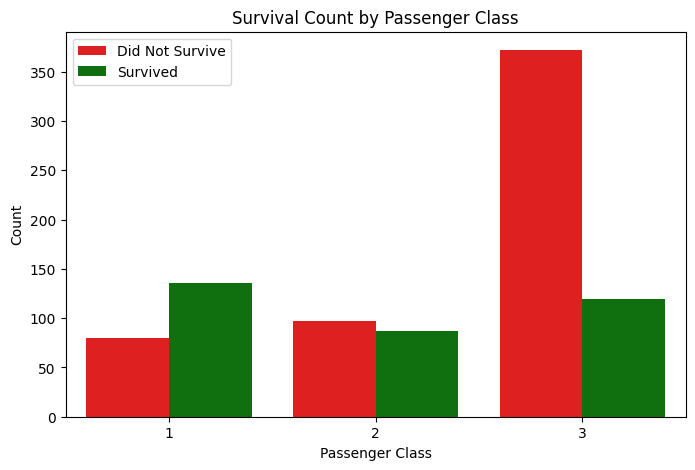

Pclass vs. Survival Count Table:
 Survived    0    1
Pclass            
1          80  136
2          97   87
3         372  119

Pclass vs. Survival Percentage Table:
 Survived          0          1
Pclass                        
1         37.037037  62.962963
2         52.717391  47.282609
3         75.763747  24.236253


In [ ]:
# 🔹 Countplot: Survival vs. Pclass
plt.figure(figsize=(8, 5))
sns.countplot(x="Pclass", hue="Survived", data=df, palette=["red", "green"])
plt.title("Survival Count by Passenger Class")
plt.xlabel("Passenger Class")
plt.ylabel("Count")
plt.legend(["Did Not Survive", "Survived"])
plt.show()

# 🔹 Crosstab for Statistical View
pclass_survival_ct = pd.crosstab(df["Pclass"], df["Survived"])
print("Pclass vs. Survival Count Table:\n", pclass_survival_ct)

# 🔹 Calculate Percentages
pclass_survival_percentage = pclass_survival_ct.div(pclass_survival_ct.sum(axis=1), axis=0) * 100
print("\nPclass vs. Survival Percentage Table:\n", pclass_survival_percentage)

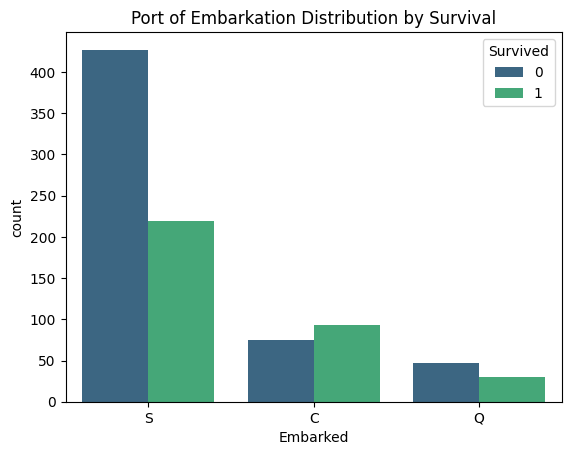

In [ ]:
sns.countplot(x=df['Embarked'], hue=df['Survived'], palette="viridis")
plt.title("Port of Embarkation Distribution by Survival")
plt.show()


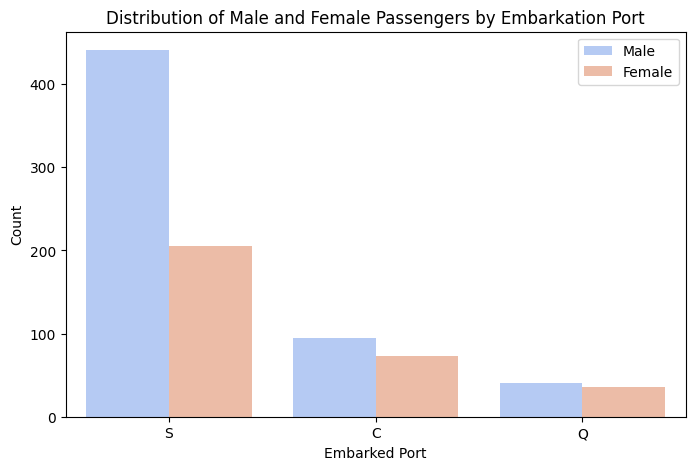

Embarked vs. Sex Count Table:
 Sex       female  male
Embarked              
C             73    95
Q             36    41
S            205   441

Embarked vs. Sex Percentage Table:
 Sex          female       male
Embarked                      
C         43.452381  56.547619
Q         46.753247  53.246753
S         31.733746  68.266254


In [ ]:
# 🔹 Countplot of Embarked vs. Sex
plt.figure(figsize=(8, 5))
sns.countplot(x="Embarked", hue="Sex", data=df, palette="coolwarm")
plt.title("Distribution of Male and Female Passengers by Embarkation Port")
plt.xlabel("Embarked Port")
plt.ylabel("Count")
plt.legend(["Male", "Female"])
plt.show()

# 🔹 Crosstab for statistical view
embarked_sex_ct = pd.crosstab(df["Embarked"], df["Sex"])
print("Embarked vs. Sex Count Table:\n", embarked_sex_ct)

# 🔹 Calculate percentages
embarked_sex_percentage = embarked_sex_ct.div(embarked_sex_ct.sum(axis=1), axis=0) * 100
print("\nEmbarked vs. Sex Percentage Table:\n", embarked_sex_percentage)

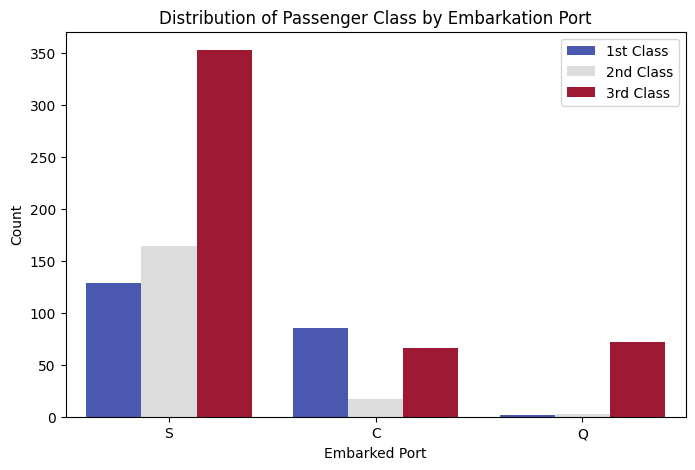

Embarked vs. Pclass Count Table:
 Pclass      1    2    3
Embarked               
C          85   17   66
Q           2    3   72
S         129  164  353

Embarked vs. Pclass Percentage Table:
 Pclass            1          2          3
Embarked                                 
C         50.595238  10.119048  39.285714
Q          2.597403   3.896104  93.506494
S         19.969040  25.386997  54.643963


In [ ]:
# 🔹 Countplot of Embarked vs. Pclass
plt.figure(figsize=(8, 5))
sns.countplot(x="Embarked", hue="Pclass", data=df, palette="coolwarm")
plt.title("Distribution of Passenger Class by Embarkation Port")
plt.xlabel("Embarked Port")
plt.ylabel("Count")
plt.legend(["1st Class", "2nd Class", "3rd Class"])
plt.show()

# 🔹 Crosstab for statistical view
embarked_class_ct = pd.crosstab(df["Embarked"], df["Pclass"])
print("Embarked vs. Pclass Count Table:\n", embarked_class_ct)

# 🔹 Calculate percentages
embarked_class_percentage = embarked_class_ct.div(embarked_class_ct.sum(axis=1), axis=0) * 100
print("\nEmbarked vs. Pclass Percentage Table:\n", embarked_class_percentage)

In [ ]:
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})

# **Overall Insights**

<Figure size 500x300 with 0 Axes>

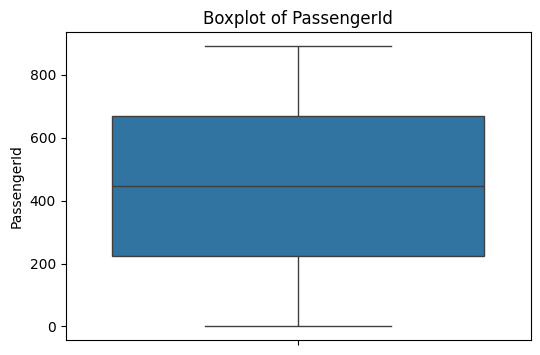

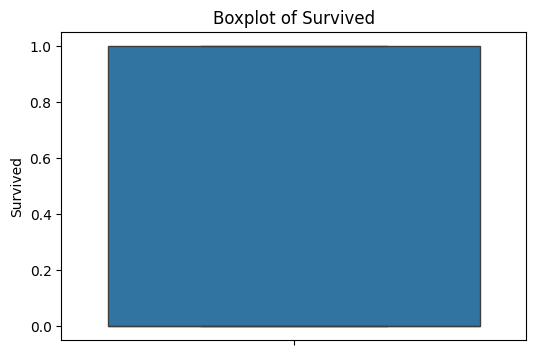

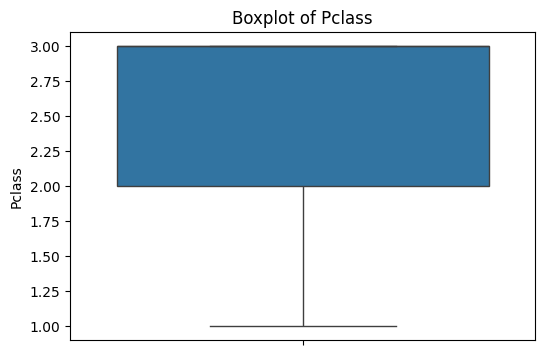

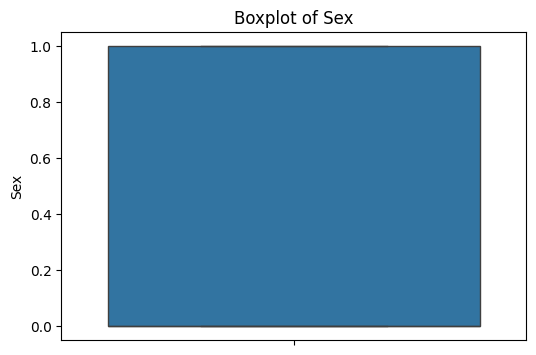

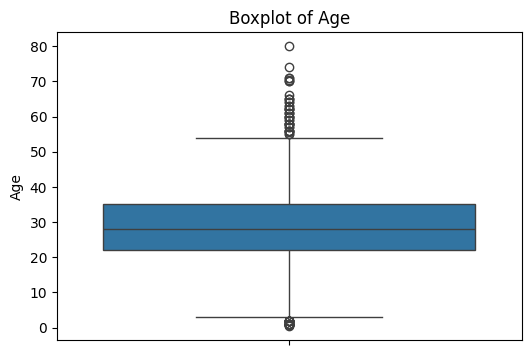

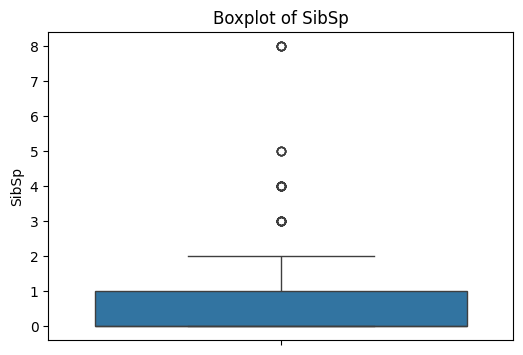

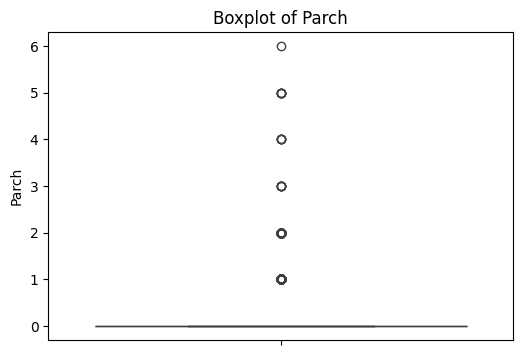

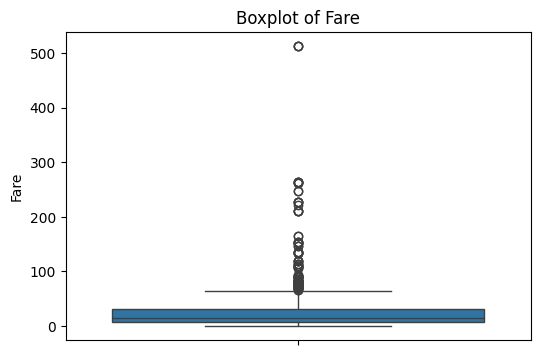

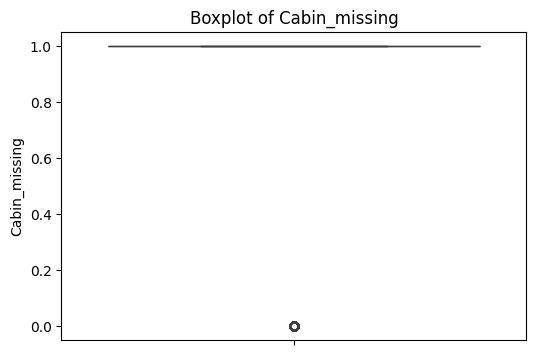

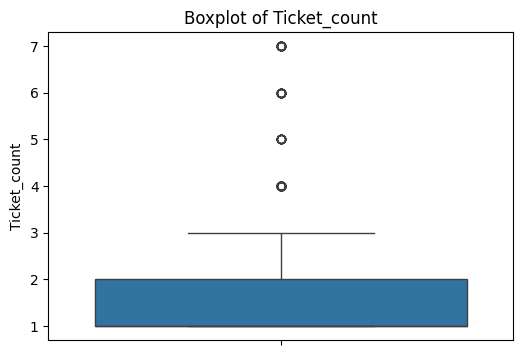

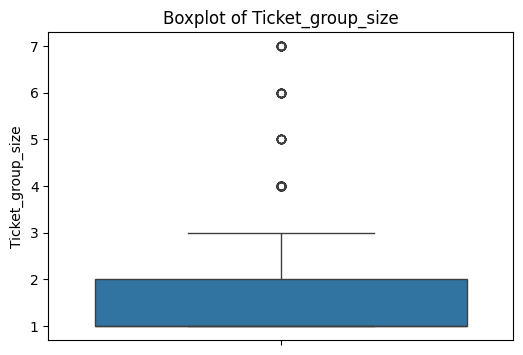

In [ ]:
plt.figure(figsize=(5, 3))
for col in df.select_dtypes(include=['number']).columns:
    plt.figure(figsize=(6, 4))
    sns.boxplot(y=df[col])
    plt.title(f"Boxplot of {col}")
    plt.show()

In [ ]:
df['Embarked'] = df['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})

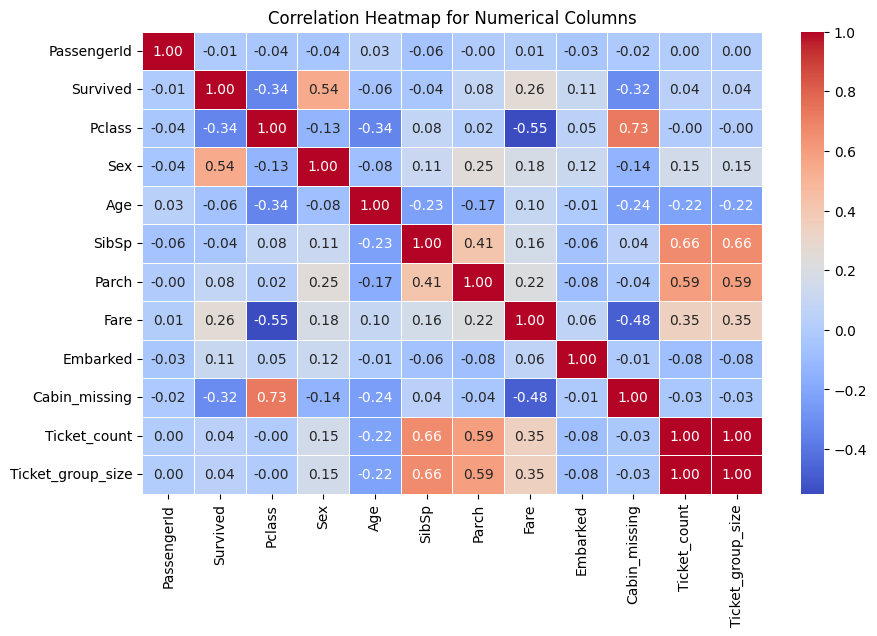

In [ ]:
numeric_df = df.select_dtypes(include=['number'])

plt.figure(figsize=(10, 6))

# Creating heatmap for numerical columns
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

# Adding title
plt.title("Correlation Heatmap for Numerical Columns")

# Show plot
plt.show()

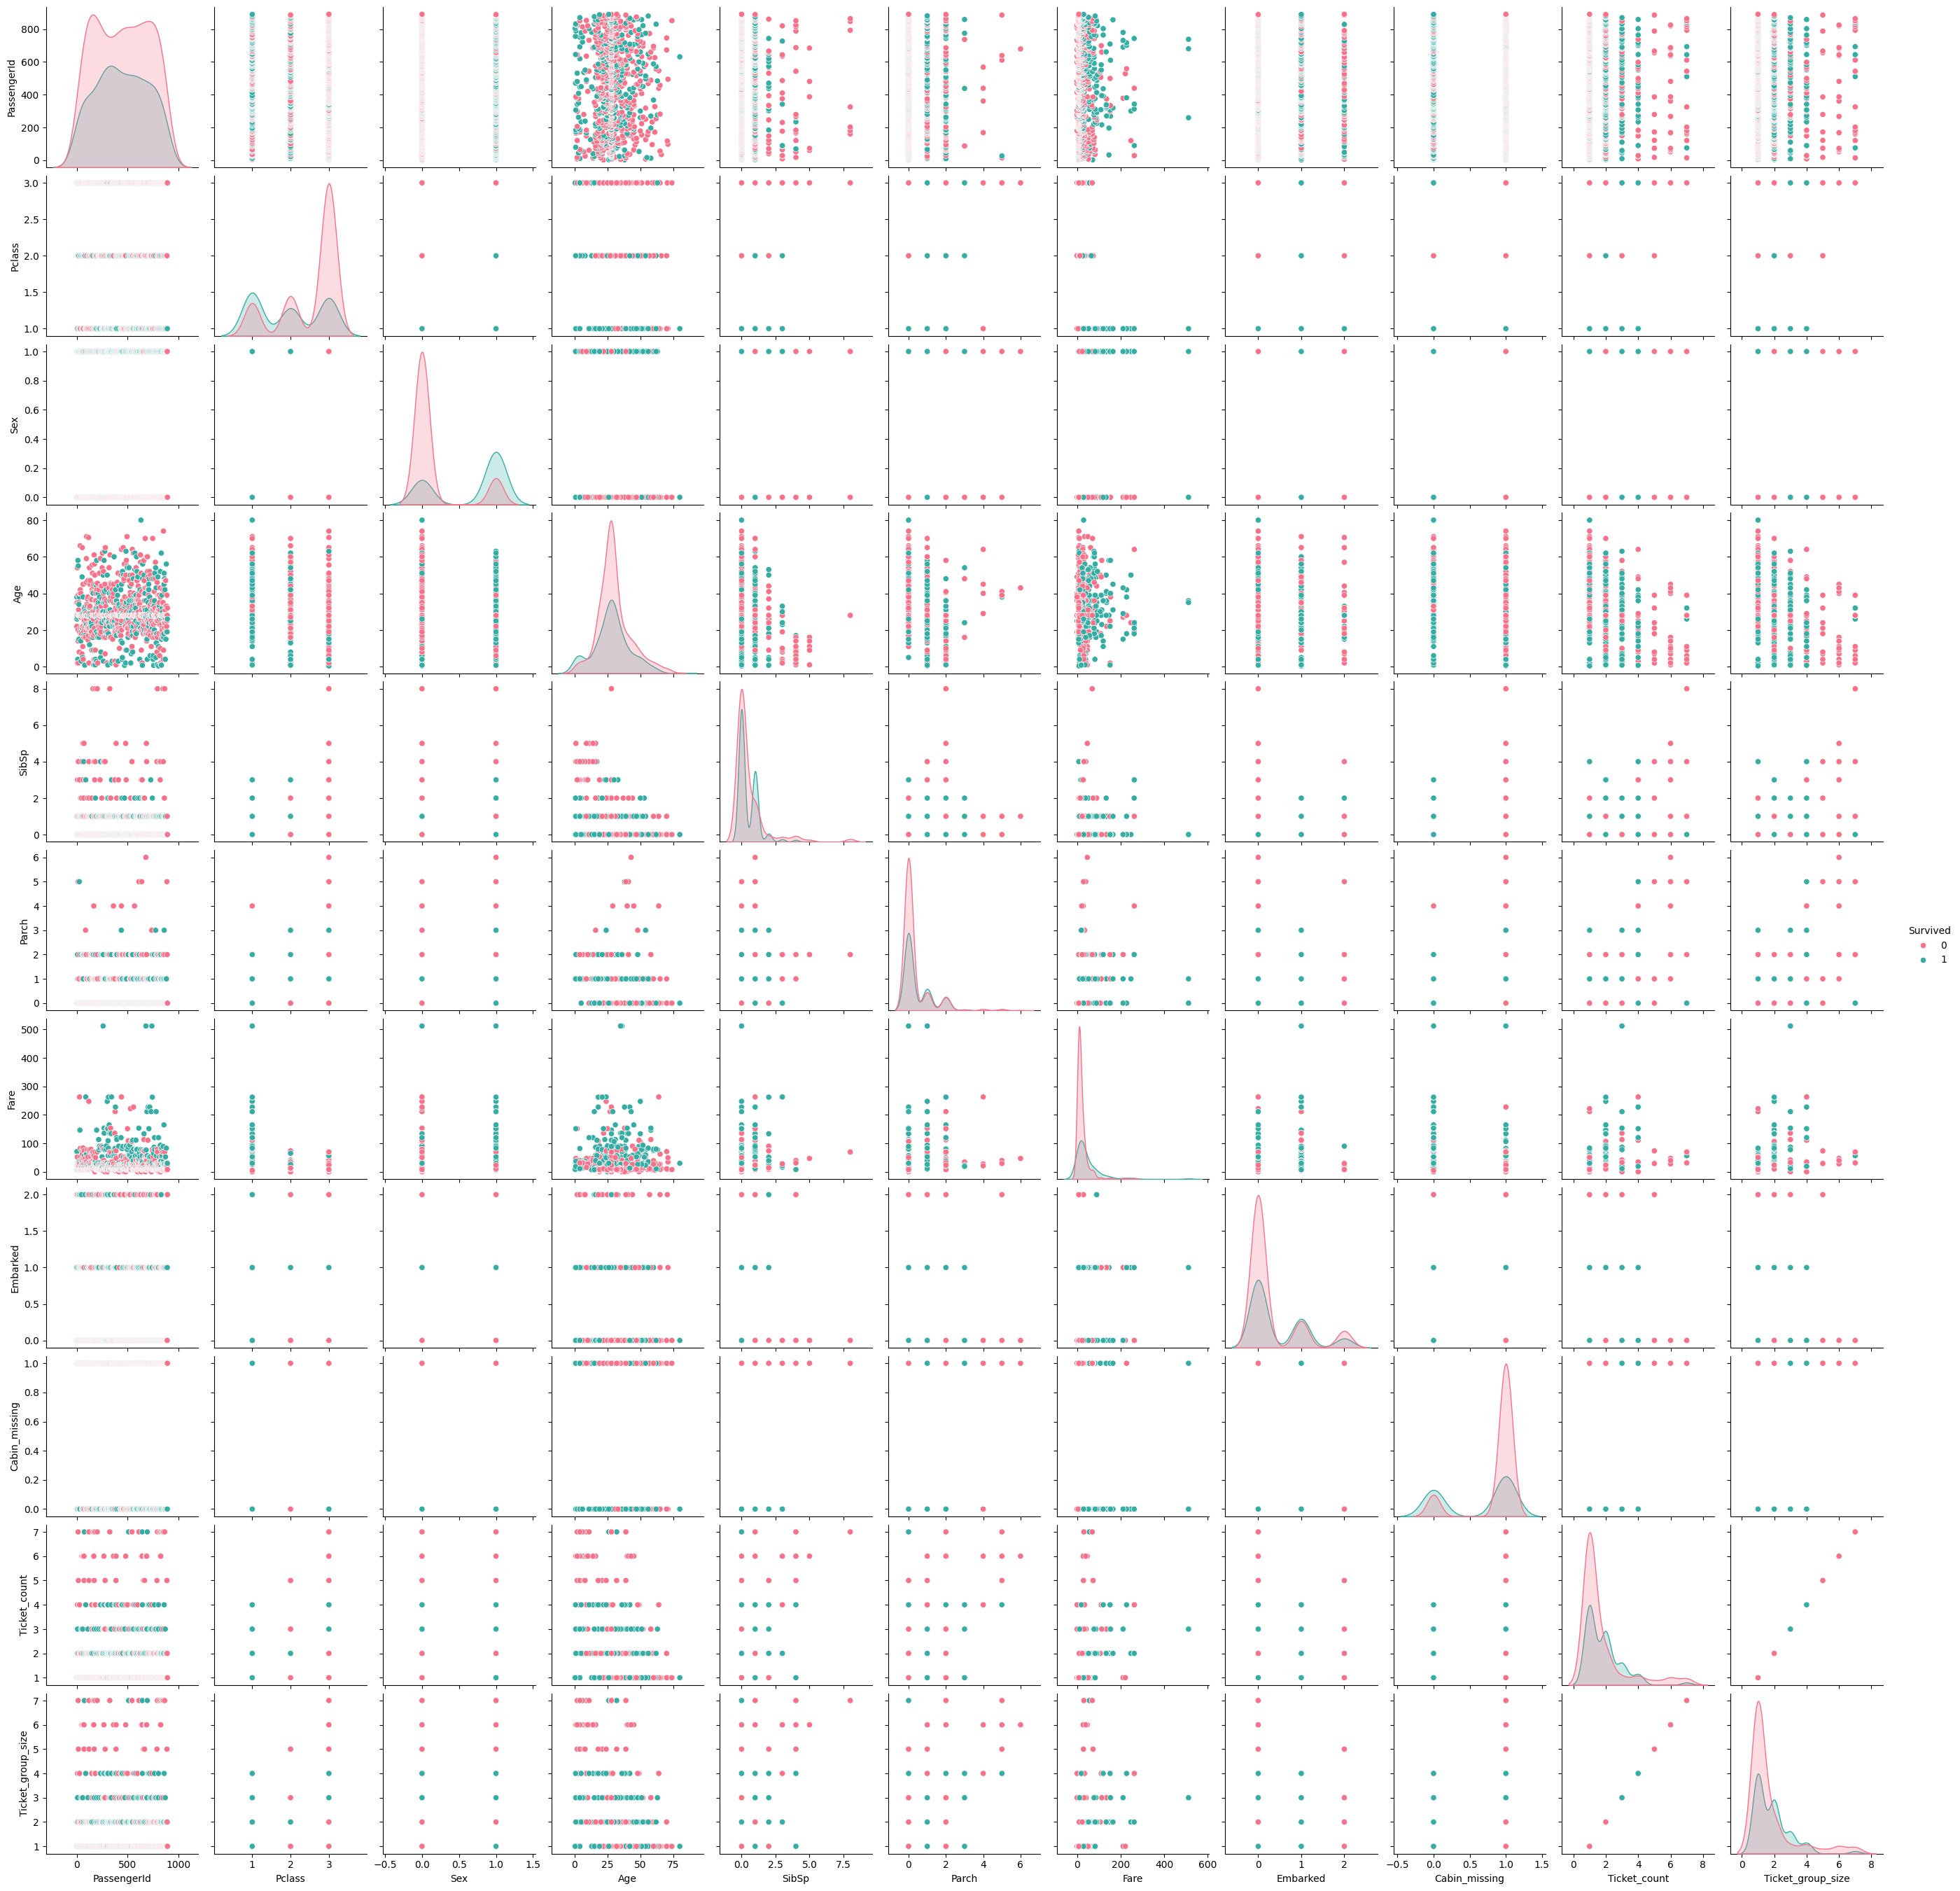

In [ ]:
sns.pairplot(numeric_df, hue="Survived", palette="husl")
plt.show()

In [ ]:
print(df.describe(include=['object']))

                           Name  Ticket    Cabin Ticket_prefix
count                       891     891      204           891
unique                      891     681      147             6
top     Braund, Mr. Owen Harris  347082  B96 B98       Numeric
freq                          1       7        4           661


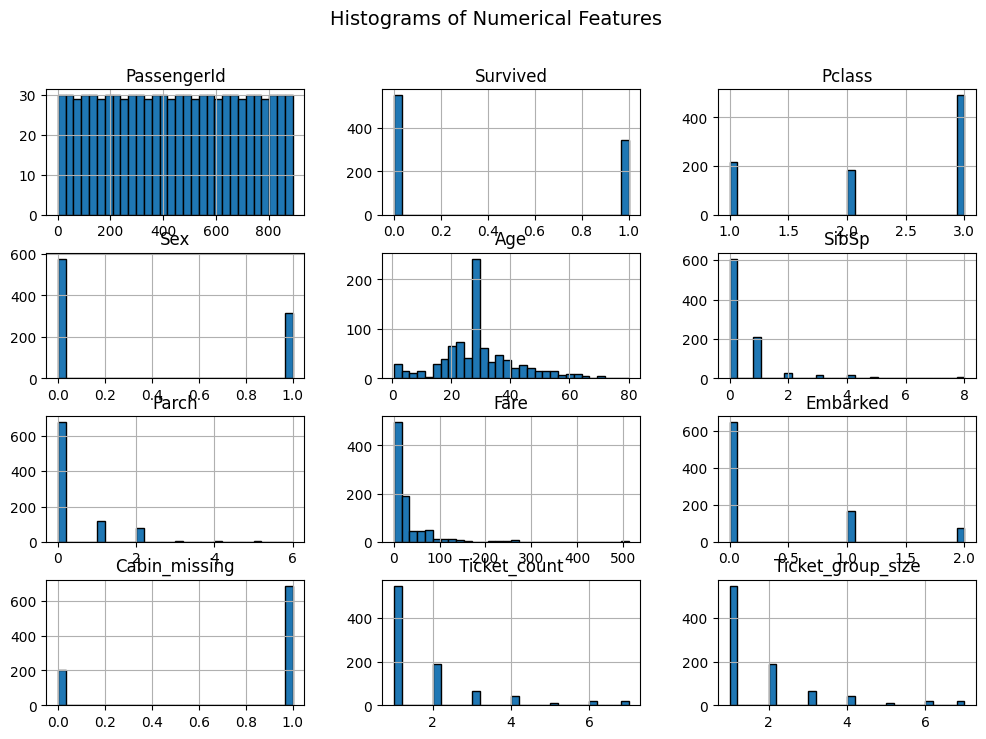

In [ ]:
numeric_df.hist(figsize=(12, 8), bins=30, edgecolor="black")

# Add title
plt.suptitle("Histograms of Numerical Features", fontsize=14)
plt.show()

# **Other preprocessing and Insights**

In [ ]:
(df['Fare'] == 0).sum()

15

In [ ]:
df['Fare'] = df['Fare'].replace(0, df['Fare'].median())

In [ ]:
(df['Fare'] == 0).sum()

0

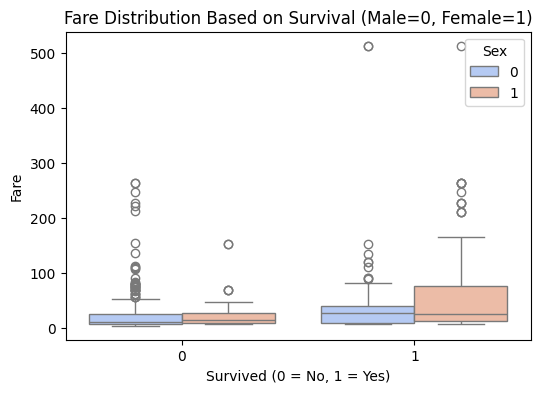

In [ ]:
plt.figure(figsize=(6, 4))
sns.boxplot(x="Survived", y="Fare", hue="Sex", data=df, palette="coolwarm")
plt.title("Fare Distribution Based on Survival (Male=0, Female=1)")
plt.xlabel("Survived (0 = No, 1 = Yes)")
plt.ylabel("Fare")
plt.legend(title="Sex")
plt.show()

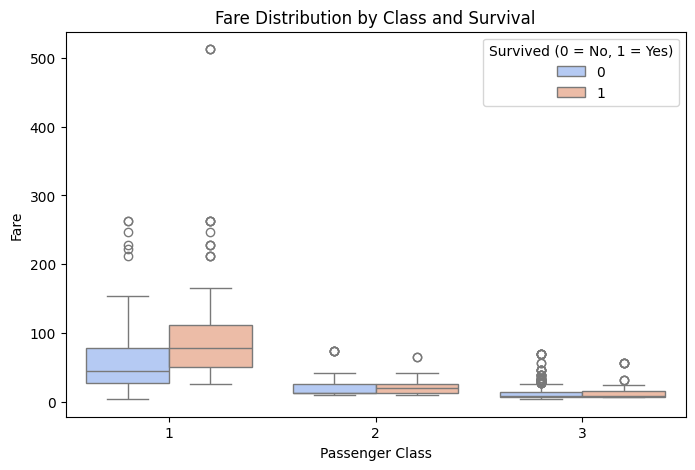

In [ ]:
plt.figure(figsize=(8, 5))
sns.boxplot(x="Pclass", y="Fare", hue="Survived", data=df, palette="coolwarm")
plt.title("Fare Distribution by Class and Survival")
plt.xlabel("Passenger Class")
plt.ylabel("Fare")
plt.legend(title="Survived (0 = No, 1 = Yes)")
plt.show()

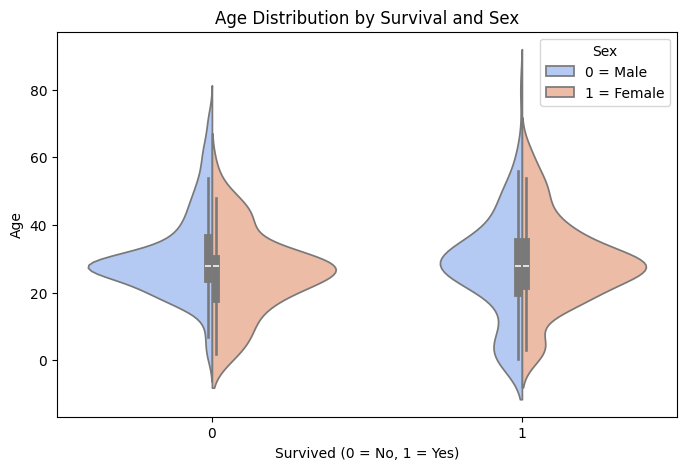

In [ ]:
plt.figure(figsize=(8, 5))

sns.violinplot(x="Survived", y="Age", hue="Sex", data=df, split=True, palette="coolwarm")

plt.title("Age Distribution by Survival and Sex")
plt.xlabel("Survived (0 = No, 1 = Yes)")
plt.ylabel("Age")

# Modify legend labels manually
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles, ["0 = Male", "1 = Female"], title="Sex")

plt.show()


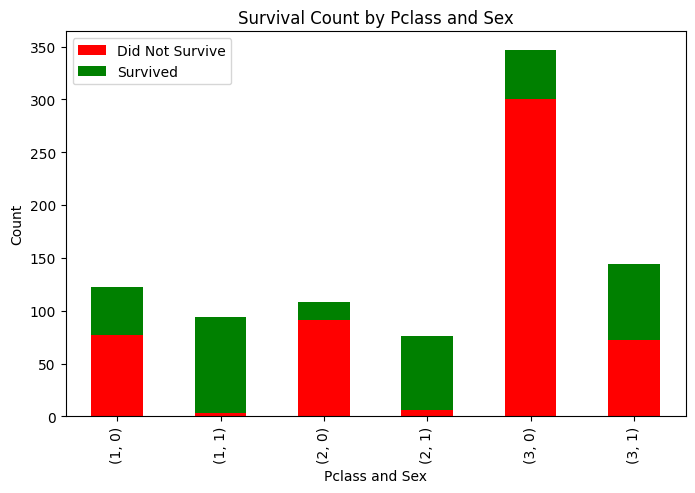

In [ ]:
pd.crosstab([df.Pclass, df.Sex], df.Survived).plot(kind="bar", stacked=True, color=["red", "green"], figsize=(8, 5))
plt.title("Survival Count by Pclass and Sex")
plt.xlabel("Pclass and Sex")
plt.ylabel("Count")
plt.legend(["Did Not Survive", "Survived"])
plt.show()

<ipython-input-76-2183848c878a>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['Survived'], y=df['FamilySize'], palette="coolwarm")


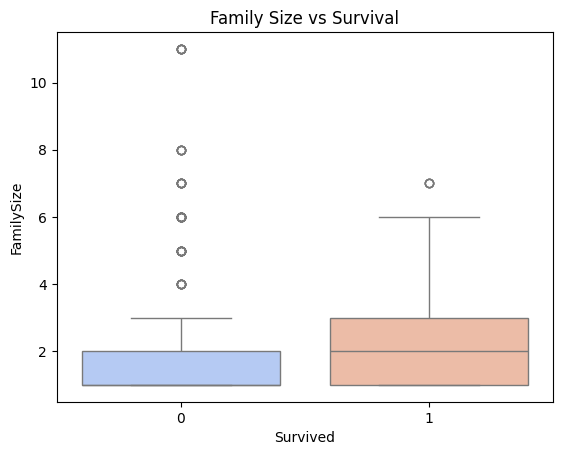

In [ ]:
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1  # Include self
sns.boxplot(x=df['Survived'], y=df['FamilySize'], palette="coolwarm")
plt.title("Family Size vs Survival")
plt.show()

In [ ]:
df['Title'] = df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
df['Title'].value_counts()

,count
Title,
Mr,517
Miss,182
Mrs,125
Master,40
Dr,7
Rev,6
Mlle,2
Major,2
Col,2


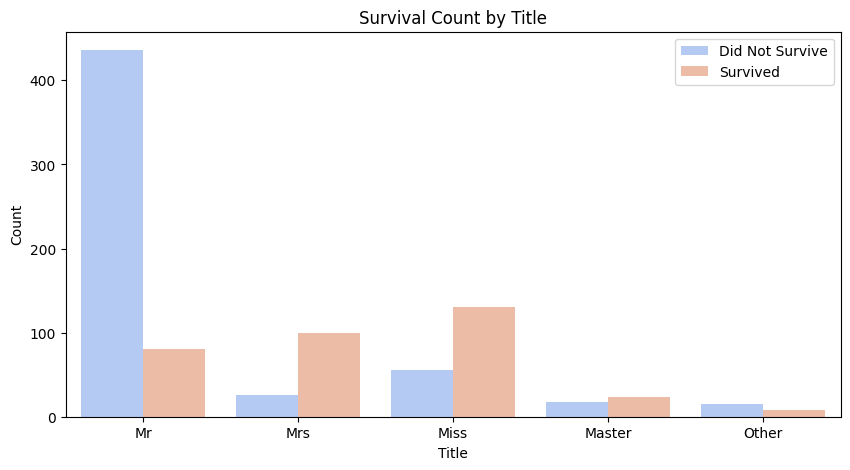

In [ ]:
# 🔹 Replace rare titles with "Other"
df["Title"] = df["Title"].replace(["Mlle", "Ms"], "Miss")
df["Title"] = df["Title"].replace(["Mme"], "Mrs")
df["Title"] = df["Title"].replace(["Capt", "Col", "Major", "Dr", "Rev", "Jonkheer", "Don", "Dona", "Countess", "Sir", "Lady"], "Other")

# 🔹 Visualize Survival Rate by Title
plt.figure(figsize=(10, 5))
sns.countplot(x=df["Title"], hue=df["Survived"], palette="coolwarm")
plt.title("Survival Count by Title")
plt.xlabel("Title")
plt.ylabel("Count")
plt.legend(["Did Not Survive", "Survived"])
plt.show()

In [ ]:
title_survival_rates = df.groupby("Title")["Survived"].mean().sort_values(ascending=False)
print("Survival Rates by Title:\n", title_survival_rates)

Survival Rates by Title:
 Title
Mrs       0.793651
Miss      0.702703
Master    0.575000
Other     0.347826
Mr        0.156673
Name: Survived, dtype: float64


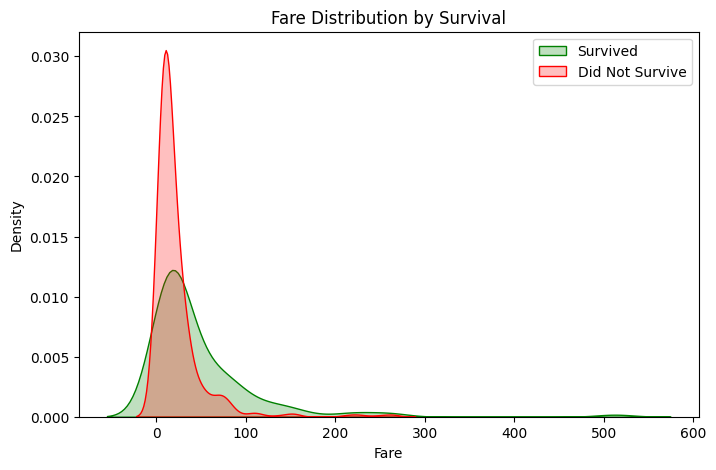

In [ ]:
plt.figure(figsize=(8, 5))
sns.kdeplot(df[df['Survived'] == 1]['Fare'], label="Survived", fill=True, color="green")
sns.kdeplot(df[df['Survived'] == 0]['Fare'], label="Did Not Survive", fill=True, color="red")
plt.title("Fare Distribution by Survival")
plt.xlabel("Fare")
plt.ylabel("Density")
plt.legend()
plt.show()

In [ ]:
from scipy.stats import chi2_contingency

contingency_table = pd.crosstab(df['Sex'], df['Survived'])
chi2, p, _, _ = chi2_contingency(contingency_table)
print(f"Chi-Square Test P-Value for Sex & Survival: {p:.5f}")

contingency_table = pd.crosstab(df['Pclass'], df['Survived'])
chi2, p, _, _ = chi2_contingency(contingency_table)
print(f"Chi-Square Test P-Value for Pclass & Survival: {p:.5f}")


Chi-Square Test P-Value for Sex & Survival: 0.00000
Chi-Square Test P-Value for Pclass & Survival: 0.00000
